In [1]:
%run -i "D:/Data_Science/Projects/PIK/import_lib.ipynb"
seed = 42

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv("train_f.csv")
test = pd.read_csv("test_f.csv")
# id_test = pd.read_csv("id_test.csv", index_col=[0])

In [3]:
# train.drop(["value"], axis=1, inplace=True)
# test.drop(["value"], axis=1, inplace=True)

X_train = train.drop(["log_value"], axis=1)
y_train = train["log_value"]
X_test = test.drop(["log_value"], axis=1)

In [4]:
print(X_train.shape)
X_train.head()

(8716, 95)


,bulk_id,spalen,mean_sq,price,ipoteka,mean_fl,month,month_cnt,avtomoika,dep_1,dep_1_3,dep_3,input_groups,dvor_no_car,det_sad,to_cremlin,to_sadoviy,to_ttk,to_big_road,to_metro,to_park_foot,to_park,to_prom,to_conv_avtorazvyazka,kladovie,num_pomesh,kolyas,course,mashinomest,ogorozh_ter,dvor_sq,green_sq_500,zem_sq,prom_sq_500,parking_under,station_num_koltso,fok,school,poliklinnika_0,poliklinnika_500,poliklinnika_510,poliklinnika_600,object_class_0,object_class_1,object_class_2,video_0,video_1,video_2,vent_0,vent_1,vent_2,cond_0,cond_1,cond_3,spalen_0,spalen_1,spalen_2,spalen_3,spalen_4,year,quarter,log_price,log_mean_sq,log_green_sq_500,log_prom_sq_500,log_dvor_sq,log_to_big_road,log_to_park,log_to_park_foot,log_to_prom,log_to_metro,log_to_conv_avtorazvyazka,ipoteka_on_course,mean_sq_sq,mean_fl_on_mean_sq,mean_fl_on_spalen,price_to_spalen,log_price_to_spalen,mean_sq_to_spalen,log_mean_sq_to_spalen,price_to_mean_sq,log_price_to_log_mean_sq,mean_sq_to_mean_fl,total_dist,total_dist_log,max_dist,max_dist_log,school_plus_det_sad,month_minus_month_cnt,ipoteka_minus_dep_1,ipoteka_minus_dep_1_3,ipoteka_minus_dep_3,dep_3_minus_dep1,dep_3_minus_dep1_3,dep_1_3_minus_dep1
0,23,2,60.10,93238.000000,13.3,12,7,7,1,8.84,8.74,9.69,0,0,1000,25.0,23.0,19.0,1.5,5.1,0.34,0.25,0.46,7.3,1,3301,0,57.17967,2625,1,7343.0,262718.0,22.0,13442.0,0,12.0,0,2500,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,2015,3,11.442921,4.112512,12.478840,9.506214,8.901639,0.916291,0.223144,0.292670,0.378436,1.808289,2.116256,760.489606,3612.0100,721.20,24,31079.333333,3.814307,20.033333,1.370837,1551.381032,2.238219,5.008333,81.95,5.735085,25.0,2.116256,3500,0,4.46,4.56,3.61,0.85,0.95,-0.1
1,33,1,35.30,115042.000000,13.3,8,7,7,1,8.84,8.74,9.69,0,1,900,19.0,16.0,14.0,1.6,1.5,1.30,1.10,0.13,10.0,0,3685,0,57.17967,1400,1,5903.0,0.0,41.0,136344.0,0,8.0,0,3250,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,2015,3,11.653061,3.591818,0.000000,11.822944,8.683385,0.955511,0.741937,0.832909,0.122218,0.916291,2.397895,760.489606,1246.0900,282.40,8,57521.000000,5.826531,17.650000,1.795909,3258.980170,2.537788,4.412500,64.63,5.966762,19.0,2.397895,4150,0,4.46,4.56,3.61,0.85,0.95,-0.1
2,36,0,26.29,90922.210008,13.3,5,7,7,1,8.84,8.74,9.69,0,1,900,19.0,16.0,14.0,1.3,1.2,1.50,1.30,0.13,9.5,0,3685,0,57.17967,1400,1,6083.0,0.0,41.0,265718.0,0,8.0,0,3250,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,2015,3,11.417771,3.306520,0.000000,12.490195,8.713418,0.832909,0.832909,0.916291,0.122218,0.788457,2.351375,760.489606,691.1641,131.45,0,90922.210008,11.417771,26.290000,3.306520,3458.433245,2.651275,5.258000,63.93,5.844159,19.0,2.351375,4150,0,4.46,4.56,3.61,0.85,0.95,-0.1
3,36,1,36.02,85753.568871,13.3,5,7,7,1,8.84,8.74,9.69,0,1,900,19.0,16.0,14.0,1.3,1.2,1.50,1.30,0.13,9.5,0,3685,0,57.17967,1400,1,6083.0,0.0,41.0,265718.0,0,8.0,0,3250,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,2015,3,11.359245,3.611458,0.000000,12.490195,8.713418,0.832909,0.832909,0.916291,0.122218,0.788457,2.351375,760.489606,1297.4404,180.10,5,42876.784436,5.679622,18.010000,1.805729,2380.720957,2.463265,7.204000,63.93,5.844159,19.0,2.351375,4150,0,4.46,4.56,3.61,0.85,0.95,-0.1
4,60,1,37.92,66077.983700,13.3,6,7,7,1,8.84,8.74,9.69,0,0,1000,25.0,23.0,19.0,1.9,4.7,0.50,0.30,0.30,6.4,1,3301,0,57.17967,2625,1,7968.0,111466.0,22.0,13391.0,0,12.0,0,2500,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,2015,3,11.098606,3.661508,11.621484,9.502413,8.983314,1.064711,0.262364,0.405465,0.262364,1.740466,2.001480,760.489606,1437.9264,227.52,6,33038.991850,5.549303,18.960000,1.830754,1742.562861,2.380905,6.320000,81.10,5.736851,25.0,2.001480,3500,0,4.46,4.56,3.61,0.85,0.95,-0.1


## predict by mean

In [5]:
# group_df = train.groupby(["spalen"])["log_value"].mean()

# def agg_fun(row):
#     spalen = row["spalen"]
#     return group_df[spalen]

# y_pred = test.apply(lambda row: agg_fun(row), axis=1)

In [6]:
# y_pred = np.exp(y_pred)-1
# y_pred = pd.concat([id_test, pd.DataFrame(y_pred, columns=["y_pred"])], axis=1)

# y_pred.sort_values(["id_test"], inplace=True)
# y_pred.drop("id_test", inplace=True, axis=1)
# y_pred = y_pred.values

# y_pred = pd.DataFrame(y_pred, columns=["value"])
# y_pred = y_pred.reindex(y_pred.index.rename('id'))
# y_pred.to_csv("mean_spalen.csv")

## CV / val

In [8]:
cv = TimeSeriesSplit(n_splits = 3) 

# for train_index, test_index in cv.split(X_train):
#     print("TRAIN:", train_index, "TEST:", test_index)

In [7]:
# split X_train on X_tr X_val

n_sample = X_train.shape[0]
n_train = int(0.75*n_sample)
n_val = n_sample - n_train

X_tr, X_val = X_train.iloc[:n_train], X_train.iloc[n_train:]
y_tr, y_val = y_train.iloc[:n_train], y_train.iloc[n_train:]

## RF RandomSearch

In [ ]:
param_dist ={       
            'max_depth': hp.quniform('max_depth', 4, 22, 1),
            'max_features': hp.quniform('max_features', X_test.shape[1]//3, X_test.shape[1], 1),
            'n_estimators': hp.quniform('n_estimators', 50, 500, 5),
}

In [ ]:
n_iter_search = 5
metric = "rmse"

In [ ]:
rf_rs = RandomizedSearchCV(xgb_clf, param_distributions=param_dist, 
                                   n_iter=n_iter_search, scoring=metric, random_state=seed, cv=ps, n_jobs=-1)

In [ ]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
def evaluate_param(parameter, num_range, index):
    
    xgb_rs = RandomizedSearchCV(xgb_clf, param_distributions=param_dist, 
                                   n_iter=n_iter_search, scoring=metric, random_state=seed, cv=cv, n_jobs=-1)
    
    

    
    grid_search = GridSearchCV(clf, param_grid = {parameter: num_range}, cv=ps)
    grid_search.fit(X_train[features], y_train)
    
    df = {}
    for i, score in enumerate(grid_search.grid_scores_):
        df[score[0][parameter]] = score[1]
       
    
    df = pd.DataFrame.from_dict(df, orient='index')
    df.reset_index(level=0, inplace=True)
    df = df.sort_values(by='index')
 
    plt.subplot(3,2,index)
    plot = plt.plot(df['index'], df[0])
    plt.title(parameter)
    return plot, df

In [ ]:
index = 1
plt.figure(figsize=(16,12))
for parameter, param_range in dict.items(param_grid):   
    evaluate_param(parameter, param_range, index)
    index += 1

In [ ]:
time series split

## RF hyperopt

In [26]:
def objective_rf(space):
    print(space)
    rfreg = RandomForestRegressor(
                            max_depth = int(space['max_depth']),
                            max_features = int(space['max_features']),
                            n_estimators = int(space['n_estimators'])
    )

    eval_set  = [( X_tr, y_tr), ( X_val, y_val)]

    rfreg.fit(X_tr, y_tr)
#     ,
#             eval_set=eval_set, eval_metric="rmse",
#             early_stopping_rounds=20,verbose=False)

    pred = np.exp(rfreg.predict(X_val))-1
    rmse_scr = np.sqrt(mean_squared_error(np.exp(y_val)-1, pred))
    print ("SCORE:", rmse_scr)
    print ("     ")
    #change the metric if you like
    return {'loss':rmse_scr, 'status': STATUS_OK}


space_rf ={       
            'max_depth': hp.quniform('max_depth', 4, 22, 1),
            'max_features': hp.quniform('max_features', X_test.shape[1]//3, X_test.shape[1], 1),
            'n_estimators': hp.quniform('n_estimators', 50, 500, 5),

            #         "scale" : hp.choice("scale", [0, 1]),
            #         "normalize" : hp.choice("normalize", [0, 1]),

            'random_state': seed 
    }


n_exp = 3

start = time()

trials = Trials()
best = fmin(fn=objective_rf,
            space=space_rf,
            algo=tpe.suggest,
            max_evals=n_exp,
            trials=trials)

print("RF took %.2f minutes"% ((time() - start)/60))

{'max_depth': 6.0, 'max_features': 83.0, 'n_estimators': 195.0, 'random_state': 42}
SCORE: 323.354236342647
     
{'max_depth': 5.0, 'max_features': 58.0, 'n_estimators': 415.0, 'random_state': 42}
SCORE: 329.0212734901449
     
{'max_depth': 4.0, 'max_features': 67.0, 'n_estimators': 115.0, 'random_state': 42}
SCORE: 335.7294167549005
     
RF took 0.47 minutes


In [27]:
best_params_rf = space_eval(space_rf, best)
print (" best model: ")
pp.pprint(best_params_rf)

 best model: 
{   'max_depth': 6.0,
    'max_features': 83.0,
    'n_estimators': 195.0,
    'random_state': 42}


In [28]:
print("best result:", trials.best_trial["result"]["loss"])

best result: 323.354236342647


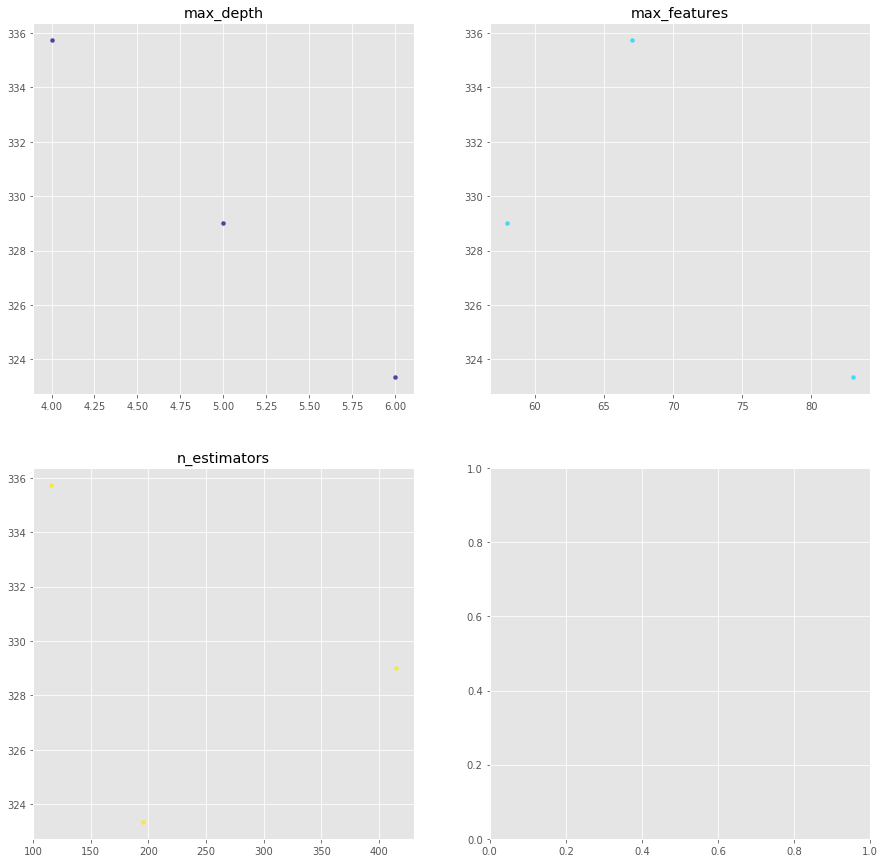

In [32]:
# n_estimators = list(range(50, 525, 25))
# max_depth = list(range(3, 9, 1))

parameters = ['max_depth', 'max_features',
#               "scale", "normalize",
              'n_estimators'
             ]

# choice_list = ["n_estimators", "max_depth"]

f, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
cmap = plt.cm.jet
for i, val in enumerate(parameters):
    xs = np.array([t['misc']['vals'][val] for t in trials.trials]).ravel()
    ys = [t['result']['loss'] for t in trials.trials]
    xs, ys = zip(*sorted(zip(xs, ys)))
    ys = np.array(ys)
    
#     if val in choice_list:
#         xs = tuple([eval(val)[index] for index in list(xs)])

        
    axes[i//2,i%2].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.7, c=cmap(float(i)/len(parameters)))
    axes[i//2,i%2].set_title(val)
    #axes[i/3,i%3].set_ylim([0.9,1.0])

In [33]:
best_params_rf['max_features'] = int(best_params_rf['max_features'])
best_params_rf['n_estimators'] = int(best_params_rf['n_estimators'])
best_params_rf['max_depth'] = int(best_params_rf['max_depth'])

# normalize_rf = best_params_rf["normalize"]
# scale_rf = best_params_rf["scale"]
# best_params_rf.pop('normalize', None)
# best_params_rf.pop('scale', None)

rfreg = RandomForestRegressor()
rfreg.set_params(**best_params_rf)

rfreg.fit(X_train, y_train)
# print(normalize_rf, scale_rf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features=83, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=195, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [37]:
y_pred = rfreg.predict(X_test)
y_pred = np.exp(y_pred)-1

# y_pred = pd.concat([id_test, pd.DataFrame(y_pred, columns=["y_pred"])], axis=1)
# y_pred.sort_values(["id_test"], inplace=True)
# y_pred.drop("id_test", inplace=True, axis=1)
# y_pred = y_pred.values

y_pred = pd.DataFrame(y_pred, columns=["value"])
y_pred = y_pred.reindex(y_pred.index.rename('id'))
y_pred.to_csv("rf_val_feat_0607set.csv")

## XGBoost hyperopt

In [80]:
def objective_xgb(space):
    print(space)
    xgb = XGBRegressor(
                        max_depth = int(space['max_depth']),
                        n_estimators = int(space['n_estimators']),

                        min_child_weight = space['min_child_weight'],


                        learning_rate = space['learning_rate'],
                        subsample = space['subsample'],
                        colsample_bytree = space['colsample_bytree'],
                        gamma = space['gamma'],
                        reg_alpha = space['reg_alpha'],
                        reg_lambda = space['reg_lambda'],
        
    )

    eval_set  = [( X_tr, y_tr), ( X_val, y_val)]

    xgb.fit(X_tr, y_tr,
            eval_set=eval_set, eval_metric="rmse",
            early_stopping_rounds=20,verbose=False)

    pred = np.exp(xgb.predict(X_val))-1
    rmse_scr = np.sqrt(mean_squared_error(np.exp(y_val)-1, pred))
    print ("SCORE:", rmse_scr)
    print ("     ")
    #change the metric if you like
    return {'loss':rmse_scr, 'status': STATUS_OK}


space_xgb ={   
    
        'learning_rate': hp.loguniform('learning_rate', np.log(1e-3), np.log(0.3)), #(-6.9, -1.2)
    
        'n_estimators': hp.quniform("n_estimators", 50, 500, 5),
    
        'max_depth': hp.quniform('max_depth', 4, 22, 1),
        'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
    
        'subsample': hp.uniform('subsample', 0.7, 1),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.7, 1),
    
        'gamma': hp.uniform('gamma', 0, 1),
        
        'reg_alpha': hp.uniform('reg_alpha', 0, 2), 
        'reg_lambda': hp.uniform('reg_lambda', 0, 2),

#         'scale': hp.choice('scale', [0, 1]),
#         'normalize': hp.choice('normalize', [0, 1]),
      
        'objective': 'reg:linear',
        'booster': 'gbtree',
        'random_state': seed   
    }


n_exp = 250

start = time()

trials = Trials()
best = fmin(fn=objective_xgb,
            space=space_xgb,
            algo=tpe.suggest,
            max_evals=n_exp,
            trials=trials)

print("XGBoost took %.2f minutes"% ((time() - start)/60))

{'booster': 'gbtree', 'colsample_bytree': 0.7379424471525992, 'gamma': 0.004999697518037749, 'learning_rate': 0.010657991670316249, 'max_depth': 21.0, 'min_child_weight': 6.0, 'n_estimators': 230.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 0.17016566979914605, 'reg_lambda': 0.9137950034836533, 'subsample': 0.9324044158593067}
SCORE: 323.1796669678239
     
{'booster': 'gbtree', 'colsample_bytree': 0.9076638022100803, 'gamma': 0.21408059228068477, 'learning_rate': 0.056081681766380974, 'max_depth': 19.0, 'min_child_weight': 2.0, 'n_estimators': 295.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 0.34177888129304135, 'reg_lambda': 0.06086630182112596, 'subsample': 0.8269661265016257}
SCORE: 282.7861739851502
     
{'booster': 'gbtree', 'colsample_bytree': 0.8557770497480703, 'gamma': 0.4445320518734217, 'learning_rate': 0.017842795235950233, 'max_depth': 7.0, 'min_child_weight': 4.0, 'n_estimators': 265.0, 'objective': 'reg:linear', 'random_state': 42, '

SCORE: 285.5956827383336
     
{'booster': 'gbtree', 'colsample_bytree': 0.9895734585387517, 'gamma': 0.02096927953771674, 'learning_rate': 0.03775424709126295, 'max_depth': 15.0, 'min_child_weight': 1.0, 'n_estimators': 495.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 1.3847279293874843, 'reg_lambda': 0.3696328068163094, 'subsample': 0.8811064580576894}
SCORE: 284.10098644120063
     
{'booster': 'gbtree', 'colsample_bytree': 0.7045727860578559, 'gamma': 0.9880218332616384, 'learning_rate': 0.03584010799382071, 'max_depth': 19.0, 'min_child_weight': 1.0, 'n_estimators': 320.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 0.8105474816813562, 'reg_lambda': 0.6352092914587611, 'subsample': 0.9144190557303409}
SCORE: 279.1680392945183
     
{'booster': 'gbtree', 'colsample_bytree': 0.7010144909763683, 'gamma': 0.9371775446819293, 'learning_rate': 0.02450684813391407, 'max_depth': 12.0, 'min_child_weight': 5.0, 'n_estimators': 355.0, 'objective': 'reg:linea

SCORE: 286.4193333927857
     
{'booster': 'gbtree', 'colsample_bytree': 0.7711875865924214, 'gamma': 0.4814934814490251, 'learning_rate': 0.013790705817969593, 'max_depth': 20.0, 'min_child_weight': 1.0, 'n_estimators': 365.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 1.227527207485252, 'reg_lambda': 1.9873192128322819, 'subsample': 0.7451020669336584}
SCORE: 291.3202089496055
     
{'booster': 'gbtree', 'colsample_bytree': 0.8312351761116686, 'gamma': 0.24951047702249374, 'learning_rate': 0.004967306163076988, 'max_depth': 16.0, 'min_child_weight': 4.0, 'n_estimators': 420.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 0.7840701134624136, 'reg_lambda': 1.3262979230274037, 'subsample': 0.8105014312400365}
SCORE: 342.6823004565219
     
{'booster': 'gbtree', 'colsample_bytree': 0.8648569475024589, 'gamma': 0.8148614784842727, 'learning_rate': 0.11455688679328771, 'max_depth': 9.0, 'min_child_weight': 5.0, 'n_estimators': 265.0, 'objective': 'reg:linear

SCORE: 288.94785461291895
     
{'booster': 'gbtree', 'colsample_bytree': 0.9146275322582702, 'gamma': 0.8927153636930591, 'learning_rate': 0.005498972893065273, 'max_depth': 12.0, 'min_child_weight': 2.0, 'n_estimators': 490.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 0.1763517754641824, 'reg_lambda': 1.0265674750650124, 'subsample': 0.7066697242445723}
SCORE: 320.66608977423107
     
{'booster': 'gbtree', 'colsample_bytree': 0.9968204064649717, 'gamma': 0.8351615223978024, 'learning_rate': 0.08439980350116404, 'max_depth': 13.0, 'min_child_weight': 1.0, 'n_estimators': 475.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 0.009504452961431709, 'reg_lambda': 0.9036044490450654, 'subsample': 0.7372008694941093}
SCORE: 282.41334632569044
     
{'booster': 'gbtree', 'colsample_bytree': 0.9264219194702631, 'gamma': 0.7441239989916202, 'learning_rate': 0.03200125130925619, 'max_depth': 15.0, 'min_child_weight': 2.0, 'n_estimators': 390.0, 'objective': 'reg:l

SCORE: 289.1710759251517
     
{'booster': 'gbtree', 'colsample_bytree': 0.9337621921622911, 'gamma': 0.15899777418615502, 'learning_rate': 0.1814847019531222, 'max_depth': 12.0, 'min_child_weight': 6.0, 'n_estimators': 465.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 1.128754534152256, 'reg_lambda': 0.0824235835836649, 'subsample': 0.7911579129723185}
SCORE: 276.49440900616537
     
{'booster': 'gbtree', 'colsample_bytree': 0.9374161168737044, 'gamma': 0.13237378195618565, 'learning_rate': 0.18464666320434153, 'max_depth': 10.0, 'min_child_weight': 6.0, 'n_estimators': 265.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 1.3931777164156587, 'reg_lambda': 0.31251610217511294, 'subsample': 0.8184279613347769}
SCORE: 283.4560741272484
     
{'booster': 'gbtree', 'colsample_bytree': 0.9729782828644531, 'gamma': 0.1972114407861829, 'learning_rate': 0.23706588866021594, 'max_depth': 15.0, 'min_child_weight': 5.0, 'n_estimators': 385.0, 'objective': 'reg:linea

SCORE: 286.00034901375864
     
{'booster': 'gbtree', 'colsample_bytree': 0.8457576292501104, 'gamma': 0.4982561100517306, 'learning_rate': 0.2550343147216194, 'max_depth': 12.0, 'min_child_weight': 5.0, 'n_estimators': 370.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 0.7347574580941248, 'reg_lambda': 1.135013417596149, 'subsample': 0.7488697368891825}
SCORE: 284.2916255588712
     
{'booster': 'gbtree', 'colsample_bytree': 0.882580686239571, 'gamma': 0.24072537661446536, 'learning_rate': 0.12719743071608655, 'max_depth': 7.0, 'min_child_weight': 4.0, 'n_estimators': 250.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 0.8136897346954297, 'reg_lambda': 1.7577416403342503, 'subsample': 0.9928244789477773}
SCORE: 284.86378653096244
     
{'booster': 'gbtree', 'colsample_bytree': 0.9186939126174293, 'gamma': 0.05327622799106767, 'learning_rate': 0.026742112375112398, 'max_depth': 4.0, 'min_child_weight': 1.0, 'n_estimators': 135.0, 'objective': 'reg:linear'

SCORE: 289.6193546646947
     
{'booster': 'gbtree', 'colsample_bytree': 0.9480619362649814, 'gamma': 0.31470783300762684, 'learning_rate': 0.060405601099179654, 'max_depth': 16.0, 'min_child_weight': 2.0, 'n_estimators': 365.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 0.319044154453337, 'reg_lambda': 1.4327283625055967, 'subsample': 0.9076503322833661}
SCORE: 282.9011313681156
     
{'booster': 'gbtree', 'colsample_bytree': 0.8606832583011061, 'gamma': 0.3500195519896989, 'learning_rate': 0.15311454246129633, 'max_depth': 5.0, 'min_child_weight': 5.0, 'n_estimators': 485.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 0.8779032998712459, 'reg_lambda': 1.5058085346429189, 'subsample': 0.7099828383652224}
SCORE: 288.176693661323
     
{'booster': 'gbtree', 'colsample_bytree': 0.792349850910063, 'gamma': 0.42192971025306625, 'learning_rate': 0.22162364719864222, 'max_depth': 11.0, 'min_child_weight': 3.0, 'n_estimators': 495.0, 'objective': 'reg:linear',

SCORE: 289.61459352918257
     
{'booster': 'gbtree', 'colsample_bytree': 0.8191428184970554, 'gamma': 0.05888470945571608, 'learning_rate': 0.04719717965309257, 'max_depth': 12.0, 'min_child_weight': 1.0, 'n_estimators': 445.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 1.099372988605691, 'reg_lambda': 0.5494456378926904, 'subsample': 0.750842623982019}
SCORE: 280.16438392085735
     
{'booster': 'gbtree', 'colsample_bytree': 0.8542685853625518, 'gamma': 0.2037220964631729, 'learning_rate': 0.11078023536365518, 'max_depth': 10.0, 'min_child_weight': 2.0, 'n_estimators': 460.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 1.0485654931389852, 'reg_lambda': 1.381078992645342, 'subsample': 0.769916045373905}
SCORE: 285.69875505699207
     
{'booster': 'gbtree', 'colsample_bytree': 0.8093865199974802, 'gamma': 0.2578608448008123, 'learning_rate': 0.215418262074432, 'max_depth': 6.0, 'min_child_weight': 1.0, 'n_estimators': 495.0, 'objective': 'reg:linear', '

SCORE: 288.1081170363409
     
{'booster': 'gbtree', 'colsample_bytree': 0.9992105767933154, 'gamma': 0.31367423588521287, 'learning_rate': 0.028441105397035333, 'max_depth': 21.0, 'min_child_weight': 2.0, 'n_estimators': 420.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 0.34572411561876576, 'reg_lambda': 0.8693519483494834, 'subsample': 0.7914854996230191}
SCORE: 277.97213044641063
     
{'booster': 'gbtree', 'colsample_bytree': 0.9468713151179396, 'gamma': 0.0993606820170416, 'learning_rate': 0.14825292515811103, 'max_depth': 10.0, 'min_child_weight': 6.0, 'n_estimators': 375.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 1.0755322456736942, 'reg_lambda': 1.3230551007652727, 'subsample': 0.8304219041442631}
SCORE: 282.2256660254904
     
{'booster': 'gbtree', 'colsample_bytree': 0.8938524459778827, 'gamma': 0.7398187070823957, 'learning_rate': 0.2247086745880686, 'max_depth': 12.0, 'min_child_weight': 1.0, 'n_estimators': 220.0, 'objective': 'reg:line

SCORE: 324.8388368000899
     
{'booster': 'gbtree', 'colsample_bytree': 0.9338170904022978, 'gamma': 0.33542824285924316, 'learning_rate': 0.0184762092456144, 'max_depth': 4.0, 'min_child_weight': 2.0, 'n_estimators': 500.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 1.3923123304360643, 'reg_lambda': 1.4128248182697307, 'subsample': 0.7549774000010347}
SCORE: 301.37521715737375
     
{'booster': 'gbtree', 'colsample_bytree': 0.7384554191806056, 'gamma': 0.2292779027205947, 'learning_rate': 0.08871668402573668, 'max_depth': 9.0, 'min_child_weight': 1.0, 'n_estimators': 420.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 1.0416059528816493, 'reg_lambda': 0.14357470404022574, 'subsample': 0.9068193025117166}
SCORE: 278.8536375512818
     
{'booster': 'gbtree', 'colsample_bytree': 0.8964438195152098, 'gamma': 0.11601501111864654, 'learning_rate': 0.21567538557329802, 'max_depth': 12.0, 'min_child_weight': 3.0, 'n_estimators': 400.0, 'objective': 'reg:linear

SCORE: 292.37041327126906
     
{'booster': 'gbtree', 'colsample_bytree': 0.9463619352849723, 'gamma': 0.3589073300622468, 'learning_rate': 0.2594671109194895, 'max_depth': 14.0, 'min_child_weight': 4.0, 'n_estimators': 465.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 1.9634820452085007, 'reg_lambda': 1.6109453487366494, 'subsample': 0.7295328165562986}
SCORE: 289.82475735128963
     
{'booster': 'gbtree', 'colsample_bytree': 0.9793515915159161, 'gamma': 0.24775060430050427, 'learning_rate': 0.1778955417115798, 'max_depth': 15.0, 'min_child_weight': 3.0, 'n_estimators': 440.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 1.8946855143820773, 'reg_lambda': 1.2866315327321423, 'subsample': 0.7230255596504713}
SCORE: 293.53061732818344
     
{'booster': 'gbtree', 'colsample_bytree': 0.9430023903342385, 'gamma': 0.3330986714797223, 'learning_rate': 0.11279333397213777, 'max_depth': 16.0, 'min_child_weight': 4.0, 'n_estimators': 395.0, 'objective': 'reg:linea

SCORE: 282.8189151322778
     
{'booster': 'gbtree', 'colsample_bytree': 0.9202843885087039, 'gamma': 0.8072717744593169, 'learning_rate': 0.029767088007710572, 'max_depth': 15.0, 'min_child_weight': 6.0, 'n_estimators': 160.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 0.26448122040826794, 'reg_lambda': 1.2545827545818728, 'subsample': 0.7306903493146684}
SCORE: 290.99527261009507
     
{'booster': 'gbtree', 'colsample_bytree': 0.9837802431777538, 'gamma': 0.13123764297579252, 'learning_rate': 0.21165001165068953, 'max_depth': 14.0, 'min_child_weight': 5.0, 'n_estimators': 245.0, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 0.6536232755776592, 'reg_lambda': 1.3501349511110228, 'subsample': 0.7523150014668332}
SCORE: 292.1680136250753
     
{'booster': 'gbtree', 'colsample_bytree': 0.9390663221154079, 'gamma': 0.6539862879639072, 'learning_rate': 0.012245719023131027, 'max_depth': 13.0, 'min_child_weight': 4.0, 'n_estimators': 420.0, 'objective': 'reg:li

In [81]:
best_params_xgb = space_eval(space_xgb, best)
pp.pprint(best_params_xgb)

{   'booster': 'gbtree',
    'colsample_bytree': 0.9813798617827949,
    'gamma': 0.1553044665967532,
    'learning_rate': 0.2214690143467907,
    'max_depth': 14.0,
    'min_child_weight': 3.0,
    'n_estimators': 480.0,
    'objective': 'reg:linear',
    'random_state': 42,
    'reg_alpha': 1.802554834713723,
    'reg_lambda': 1.4741109055198172,
    'subsample': 0.7208988809427045}


In [82]:
print("best result:", trials.best_trial["result"]["loss"])

best result: 275.3045380291672


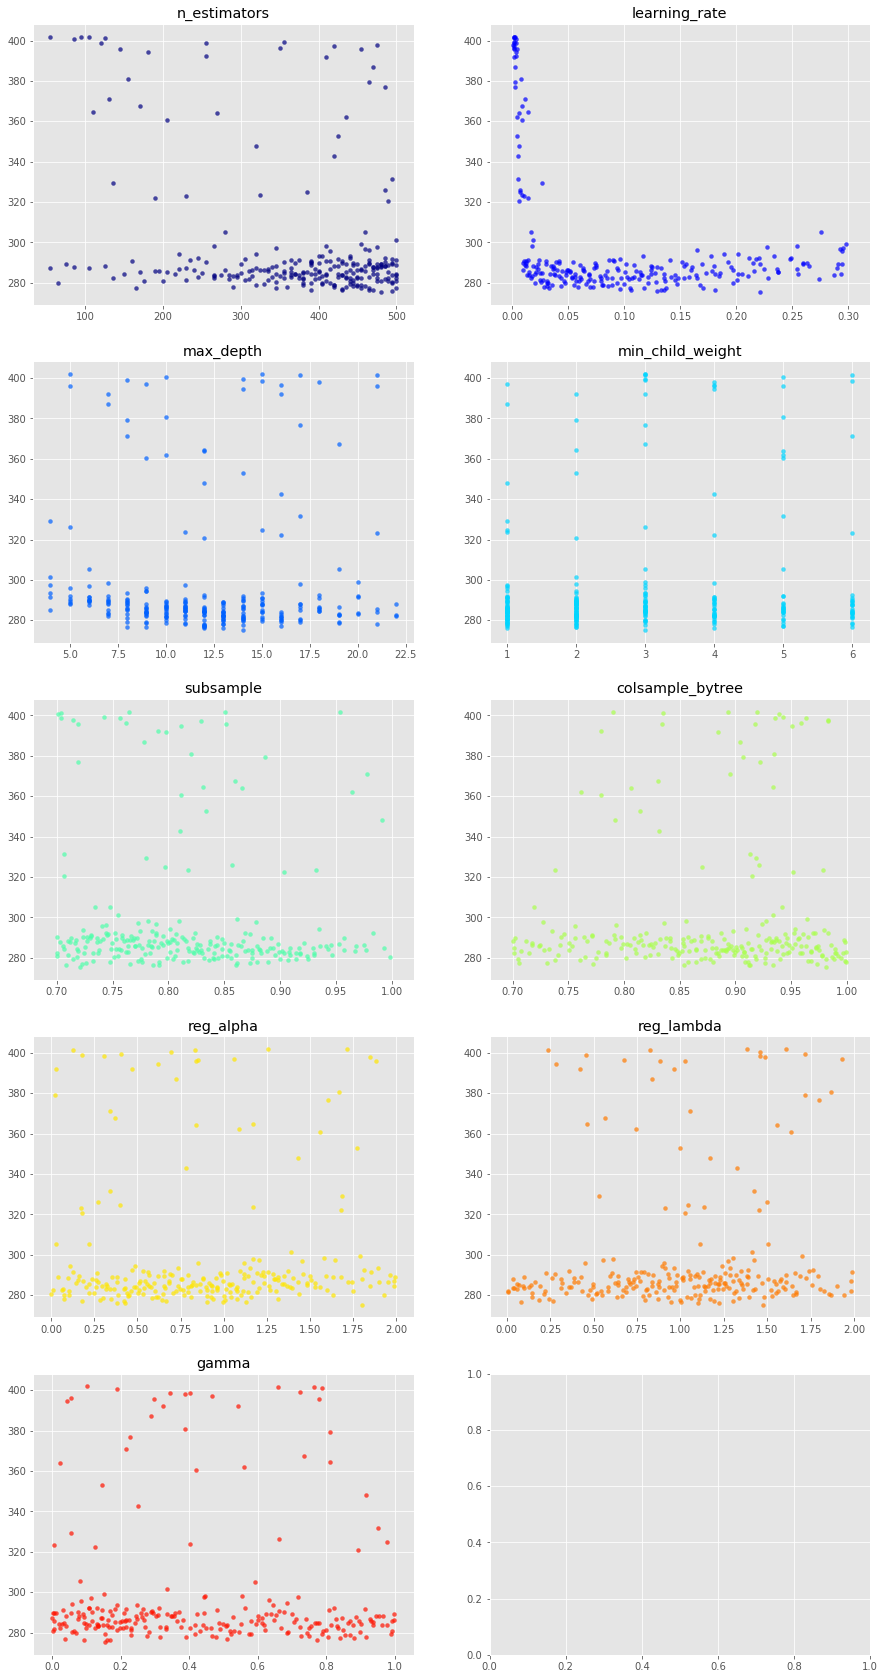

In [83]:
# n_estimators = list(range(50, 525, 25))
# max_depth = list(range(3, 9, 1))

parameters = ['n_estimators', 'learning_rate', 
              'max_depth', 'min_child_weight', 
              'subsample', 'colsample_bytree', 
              'reg_alpha', 'reg_lambda', 
#              "scale", "normalize",
             'gamma']

# choice_list = ["n_estimators", "max_depth"]

f, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,30))
cmap = plt.cm.jet
for i, val in enumerate(parameters):
    xs = np.array([t['misc']['vals'][val] for t in trials.trials]).ravel()
    ys = [t['result']['loss'] for t in trials.trials]
    xs, ys = zip(*sorted(zip(xs, ys)))
    ys = np.array(ys)
    
#     if val in choice_list:
#         xs = tuple([eval(val)[index] for index in list(xs)])

        
    axes[i//2,i%2].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.7, c=cmap(float(i)/len(parameters)))
    axes[i//2,i%2].set_title(val)
    #axes[i/3,i%3].set_ylim([0.9,1.0])

In [84]:
best_params_xgb['max_depth'] = int(best_params_xgb['max_depth'])
best_params_xgb['n_estimators'] = int(best_params_xgb['n_estimators'])

eval_set  = [( X_tr, y_tr), ( X_val, y_val)]
xgb_val = XGBRegressor()
xgb_val.set_params(**best_params_xgb)

xgb_val.fit(X_tr, y_tr,
            eval_set=eval_set, eval_metric="rmse",
            early_stopping_rounds=20,verbose=False)
results = xgb_val.evals_result()

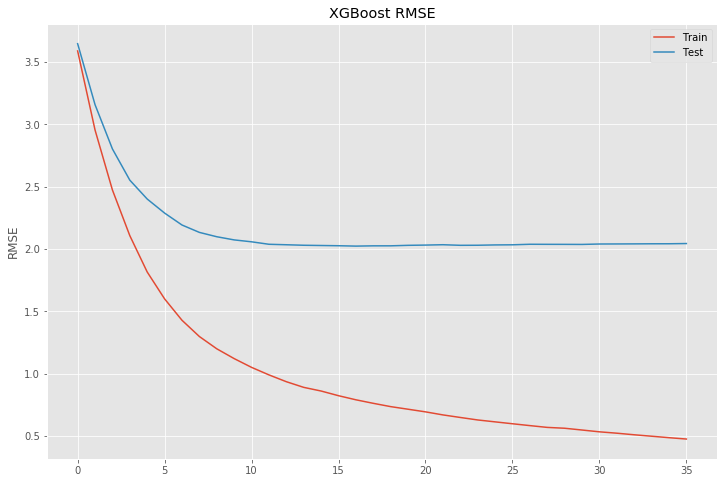

In [85]:
# plot
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)


fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

In [ ]:
# insert learning curve

In [86]:
# best_params_xgb['max_depth'] = int(best_params_xgb['max_depth'])
# best_params_xgb['n_estimators'] = int(best_params_xgb['n_estimators'])

# normalize_xgb = best_params_xgb["normalize"]
# scale_xgb = best_params_xgb["scale"]
# best_params_xgb.pop('normalize', None)
# best_params_xgb.pop('scale', None)


xgboost = XGBRegressor()
xgboost.set_params(**best_params_xgb)
xgboost.fit(X_train, y_train)

# print(normalize_xgb, scale_xgb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9813798617827949, gamma=0.1553044665967532,
       learning_rate=0.2214690143467907, max_delta_step=0, max_depth=14,
       min_child_weight=3.0, missing=None, n_estimators=480, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=1.802554834713723, reg_lambda=1.4741109055198172,
       scale_pos_weight=1, seed=None, silent=True,
       subsample=0.7208988809427045)

In [88]:
y_pred = xgboost.predict(X_test)
y_pred = np.exp(y_pred)-1

# y_pred = pd.concat([id_test, pd.DataFrame(y_pred, columns=["y_pred"])], axis=1)
# y_pred.sort_values(["id_test"], inplace=True)
# y_pred.drop("id_test", inplace=True, axis=1)
# y_pred = y_pred.values

y_pred = pd.DataFrame(y_pred, columns=["value"])
y_pred = y_pred.reindex(y_pred.index.rename('id'))
y_pred.to_csv("xgb_val_feat_0807set.csv")

## LightGBM hyperopt

In [ ]:
def objective_lgb(space):
    print(space)
    lgb = lgbm.LGBMRegressor(
                    num_leaves = int(space['num_leaves']),
                    max_depth = int(space['max_depth']),
                    min_data_in_leaf = int(space['min_data_in_leaf']),
                    n_estimators = int(space['n_estimators']),

                    boosting_type = space['boosting_type'],

                    feature_fraction = space['feature_fraction'],
                    bagging_fraction = space['bagging_fraction'],
                    learning_rate = space['learning_rate'],
                    min_sum_hessian_in_leaf = space['min_sum_hessian_in_leaf'],

                    lambda_l1 = space['lambda_l1'],
                    lambda_l2 = space['lambda_l2'],
       
    )

    eval_set  = [( X_tr, y_tr), ( X_val, y_val)]

    lgb.fit(X_tr, y_tr,
            eval_set=eval_set, eval_metric="rmse",
            early_stopping_rounds=20,verbose=False)

    pred = np.exp(lgb.predict(X_val))-1
    rmse_scr = np.sqrt(mean_squared_error(np.exp(y_val)-1, pred))
    print ("SCORE:", rmse_scr)
    print ("     ")
    #change the metric if you like
    return {'loss':rmse_scr, 'status': STATUS_OK}


space_lgb = {
    
        'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
        'n_estimators': hp.quniform("n_estimators", 50, 500, 5),
        'max_depth': hp.quniform("max_depth", 4, 30, 1),
        'num_leaves': hp.quniform('num_leaves', 10, 100, 1),
        'min_data_in_leaf':  hp.quniform ('min_data_in_leaf', 10, 100, 1),
        'feature_fraction': hp.uniform('feature_fraction', 0.7, 1),
        'bagging_fraction': hp.uniform('bagging_fraction', 0.7, 1),
        'learning_rate': hp.loguniform('learning_rate', np.log(1e-3), np.log(0.3)),
        'min_sum_hessian_in_leaf': hp.loguniform('min_sum_hessian_in_leaf', 0, 2.3),
        'lambda_l1': hp.uniform('lambda_l1', 0, 2),
        'lambda_l2': hp.uniform('lambda_l2', 0, 2),
    
#         'scale': hp.choice('scale', [0, 1]),
#         'normalize': hp.choice('normalize', [0, 1]),
    
      
#         'objective': 'reg:linear',
#         'booster': 'gbtree',
        'random_state': seed   
}

n_exp = 3


start = time()

trials = Trials()
best = fmin(fn=objective_lgb,
            space=space_lgb,
            algo=tpe.suggest,
            max_evals=n_exp,
            trials=trials)

print("LightGBM took %.2f minutes"% ((time() - start)/60))

{'bagging_fraction': 0.911493288273781, 'boosting_type': 'gbdt', 'feature_fraction': 0.792446735034527, 'lambda_l1': 0.19044314654378636, 'lambda_l2': 0.5351896202534243, 'learning_rate': 0.018038923277375156, 'max_depth': 9.0, 'min_data_in_leaf': 53.0, 'min_sum_hessian_in_leaf': 1.6196670583480786, 'n_estimators': 345.0, 'num_leaves': 97.0, 'random_state': 42}


In [ ]:
best_params_lgb = space_eval(space_lgb, best)
pp.pprint(best_params_lgb)

In [41]:
print("best result:", trials.best_trial["result"]["loss"])

best result: 279.0195859760784


KeyError: 'num_leaves'

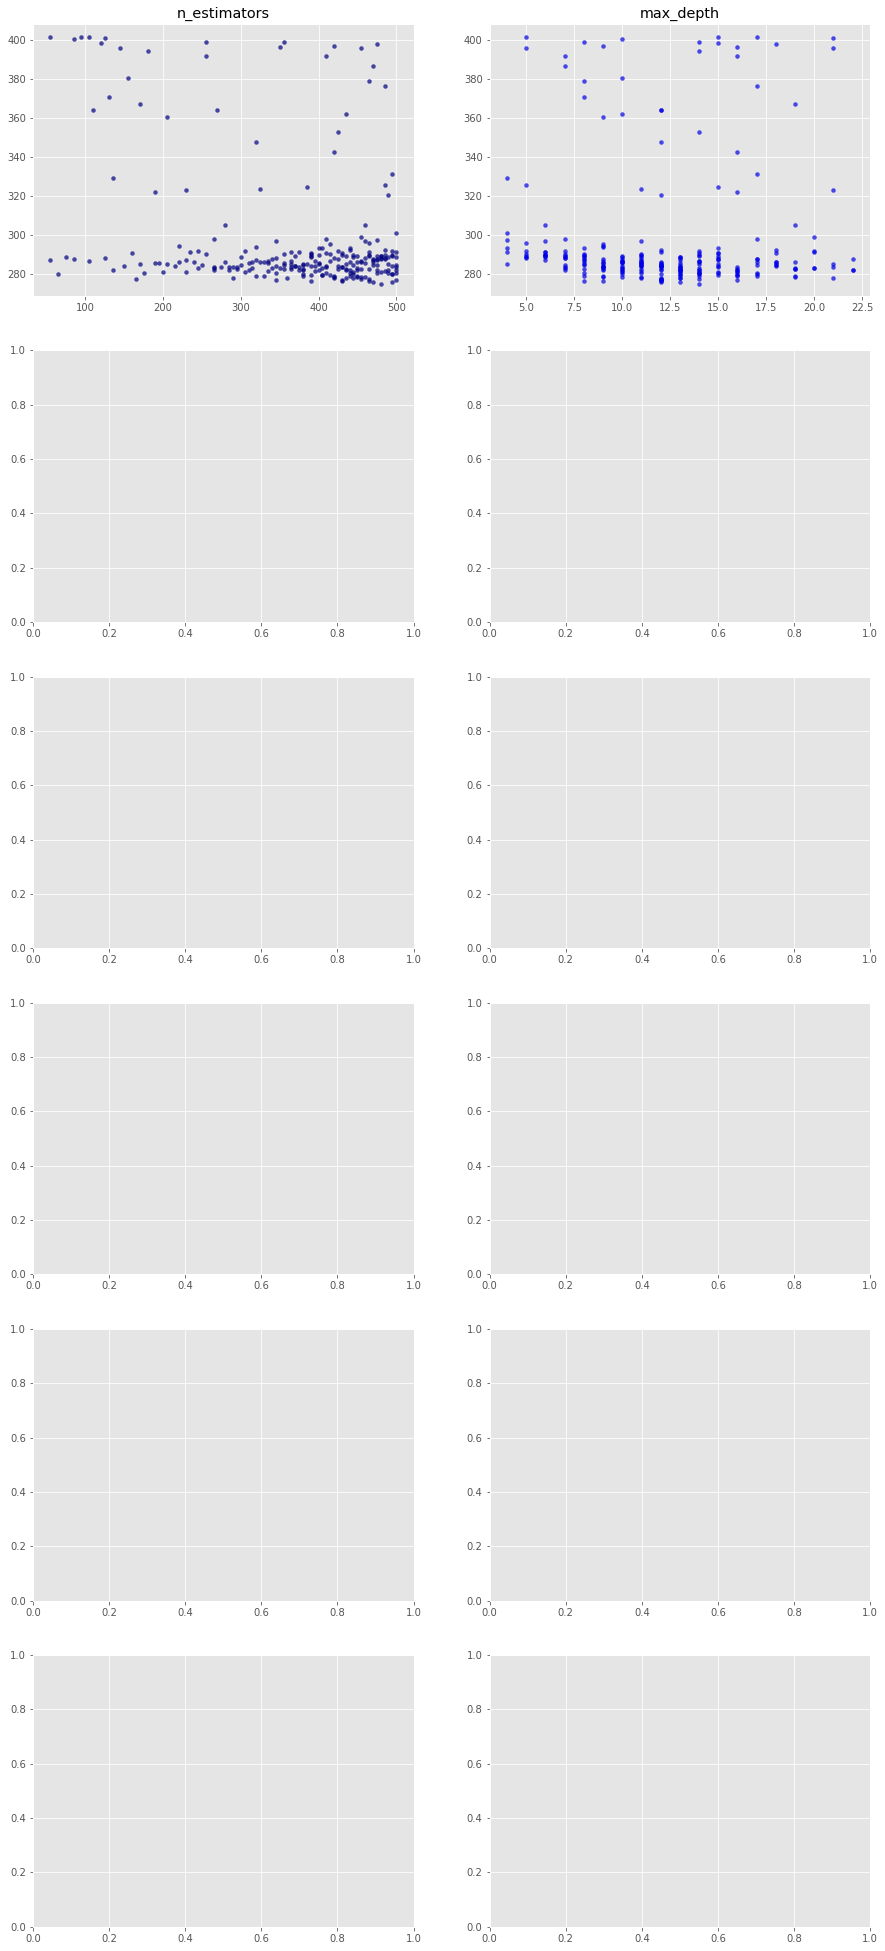

In [90]:
# n_estimators = list(range(50, 525, 25))
# max_depth = list(range(3, 9, 1))

parameters = [ 
        'n_estimators','max_depth',
        'num_leaves', 'min_data_in_leaf',
        'feature_fraction', 'bagging_fraction',
        'learning_rate', 'min_sum_hessian_in_leaf',
        'lambda_l1', 'lambda_l2',
#         'scale', 'normalize',
        'boosting_type' 
]

# choice_list = ["n_estimators", "max_depth"]

f, axes = plt.subplots(nrows=6, ncols=2, figsize=(15,35))
cmap = plt.cm.jet
for i, val in enumerate(parameters):
    xs = np.array([t['misc']['vals'][val] for t in trials.trials]).ravel()
    ys = [t['result']['loss'] for t in trials.trials]
    xs, ys = zip(*sorted(zip(xs, ys)))
    ys = np.array(ys)
    
#     if val in choice_list:
#         xs = tuple([eval(val)[index] for index in list(xs)])

        
    axes[i//2,i%2].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.7, c=cmap(float(i)/len(parameters)))
    axes[i//2,i%2].set_title(val)
    #axes[i/3,i%3].set_ylim([0.9,1.0])

In [43]:
best_params_lgb['num_leaves'] = int(best_params_lgb['num_leaves'])
best_params_lgb['max_depth'] = int(best_params_lgb['max_depth'])
best_params_lgb['min_data_in_leaf'] = int(best_params_lgb['min_data_in_leaf'])
best_params_lgb['n_estimators'] = int(best_params_lgb['n_estimators'])

eval_set  = [( X_tr, y_tr), ( X_val, y_val)]
lgb_val = XGBRegressor()
lgb_val.set_params(**best_params_xgb)

lgb_val.fit(X_tr, y_tr,
            eval_set=eval_set, eval_metric="rmse",
            early_stopping_rounds=20,verbose=False)
results = lgb_val.evals_result()

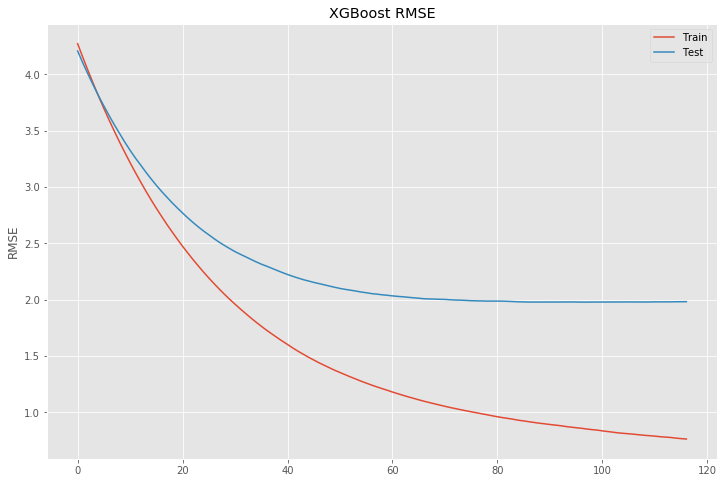

In [44]:
# plot
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)


fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

In [45]:
lgb = lgbm.LGBMRegressor()
lgb.set_params(**best_params_lgb)
lgb.fit(X_train, y_train)

LGBMRegressor(bagging_fraction=0.7760161656376622, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.7451866569600777, lambda_l1=0.8274925216346535,
       lambda_l2=1.5137508898464438, learning_rate=0.03181417643320655,
       max_depth=22, min_child_samples=20, min_child_weight=0.001,
       min_data_in_leaf=34, min_split_gain=0.0,
       min_sum_hessian_in_leaf=1.9706343949603586, n_estimators=430,
       n_jobs=-1, num_leaves=92, objective=None, random_state=42,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [337]:
y_pred = lgb.predict(X_test)
y_pred = np.exp(y_pred)-1

# y_pred = pd.concat([id_test, pd.DataFrame(y_pred, columns=["y_pred"])], axis=1)
# y_pred.sort_values(["id_test"], inplace=True)
# y_pred.drop("id_test", inplace=True, axis=1)
# y_pred = y_pred.values

y_pred = pd.DataFrame(y_pred, columns=["value"])
y_pred = y_pred.reindex(y_pred.index.rename('id'))
y_pred.to_csv("lgb_val_feat_0607set.csv")

## CatBoost hyperopt

In [338]:
import catboost as cb

In [369]:
def objective_cat(space):
    print(space)
    cat = cb.CatBoostRegressor(eval_metric="RMSE",

                    depth = space['depth'],
                    iterations = space['iterations'],
                    learning_rate = space['learning_rate'],
        
        
                    l2_leaf_reg = space['l2_leaf_reg'],

                    border_count = space['border_count'],
#                     ctr_border_count = space['ctr_border_count']
       
    )

    eval_set  = [( X_tr, y_tr), ( X_val, y_val)]

    cat.fit(X_tr, y_tr,
            eval_set=eval_set,cat_features=[X_tr.columns.get_loc("bulk_id"),  X_tr.columns.get_loc("spalen")])
#     eval_metrics="rmse",
#             early_stopping_rounds=20,verbose=False)

    pred = cat.predict(X_val)
    rmse_scr = np.sqrt(mean_squared_error(y_val, pred))
    print ("SCORE:", rmse_scr)
    print ("     ")
    #change the metric if you like
    return {'loss':rmse_scr, 'status': STATUS_OK}


space_cat = {
    
    
        'depth': hp.quniform("depth", 4, 16, 1),
        'iterations': hp.quniform("iterations", 100, 1000, 10),

        'learning_rate': hp.loguniform('learning_rate', np.log(1e-3), np.log(0.3)),

        'l2_leaf_reg': hp.quniform("l2_leaf_reg", 1, 100, 1),
        'border_count': hp.quniform("border_count", 5, 200, 5),
#         'ctr_border_count': hp.quniform("ctr_border_count", 5, 200, 5),
    
    
    
#         'scale': hp.choice('scale', [0, 1]),
#         'normalize': hp.choice('normalize', [0, 1]),
    
      
#         'objective': 'reg:linear',
#         'booster': 'gbtree',
        'random_state': seed   
}

n_exp = 3


start = time()

trials = Trials()
best = fmin(fn=objective_cat,
            space=space_cat,
            algo=tpe.suggest,
            max_evals=n_exp,
            trials=trials)

print("LightGBM took %.2f minutes"% ((time() - start)/60))

{'border_count': 25.0, 'depth': 11.0, 'iterations': 130.0, 'l2_leaf_reg': 35.0, 'learning_rate': 0.01270768234722504, 'random_state': 42}
0:	learn: 4.7895313	test: 4.7895313	best: 4.7895313 (0)	test1: 4.7094896	total: 201ms	remaining: 25.9s
1:	learn: 4.7462611	test: 4.7462611	best: 4.7462611 (1)	test1: 4.6674374	total: 362ms	remaining: 23.1s
2:	learn: 4.7003899	test: 4.7003899	best: 4.7003899 (2)	test1: 4.6221209	total: 384ms	remaining: 16.3s
3:	learn: 4.6583355	test: 4.6583234	best: 4.6583234 (3)	test1: 4.5804408	total: 569ms	remaining: 17.9s
4:	learn: 4.6157974	test: 4.6151091	best: 4.6151091 (4)	test1: 4.5394862	total: 746ms	remaining: 18.7s
5:	learn: 4.5730191	test: 4.5723368	best: 4.5723368 (5)	test1: 4.5005059	total: 784ms	remaining: 16.2s
6:	learn: 4.5330693	test: 4.5322983	best: 4.5322983 (6)	test1: 4.4676164	total: 977ms	remaining: 17.2s
7:	learn: 4.4912836	test: 4.4907285	best: 4.4907285 (7)	test1: 4.4265993	total: 1.04s	remaining: 15.8s
8:	learn: 4.4524486	test: 4.4518395	be

78:	learn: 2.7147959	test: 2.7127702	best: 2.7127702 (78)	test1: 2.7230112	total: 8.2s	remaining: 5.29s
79:	learn: 2.7016099	test: 2.6996039	best: 2.6996039 (79)	test1: 2.7115568	total: 8.41s	remaining: 5.25s
80:	learn: 2.6879305	test: 2.6859431	best: 2.6859431 (80)	test1: 2.6989965	total: 8.54s	remaining: 5.16s
81:	learn: 2.6753732	test: 2.6734118	best: 2.6734118 (81)	test1: 2.6876898	total: 8.59s	remaining: 5.03s
82:	learn: 2.6624528	test: 2.6605049	best: 2.6605049 (82)	test1: 2.6769381	total: 8.81s	remaining: 4.99s
83:	learn: 2.6493884	test: 2.6474612	best: 2.6474612 (83)	test1: 2.6647631	total: 8.87s	remaining: 4.86s
84:	learn: 2.6368901	test: 2.6349835	best: 2.6349835 (84)	test1: 2.6531561	total: 8.98s	remaining: 4.76s
85:	learn: 2.6250783	test: 2.6230208	best: 2.6230208 (85)	test1: 2.6427970	total: 9.24s	remaining: 4.73s
86:	learn: 2.6135913	test: 2.6115290	best: 2.6115290 (86)	test1: 2.6318248	total: 9.51s	remaining: 4.7s
87:	learn: 2.6022726	test: 2.6002401	best: 2.6002401 (87)

24:	learn: 4.3682563	test: 4.3671504	best: 4.3671504 (24)	test1: 4.2963251	total: 2.08s	remaining: 1m 4s
25:	learn: 4.3514956	test: 4.3503911	best: 4.3503911 (25)	test1: 4.2800606	total: 2.19s	remaining: 1m 5s
26:	learn: 4.3347463	test: 4.3336373	best: 4.3336373 (26)	test1: 4.2634268	total: 2.3s	remaining: 1m 5s
27:	learn: 4.3180777	test: 4.3171514	best: 4.3171514 (27)	test1: 4.2472075	total: 2.42s	remaining: 1m 6s
28:	learn: 4.3010612	test: 4.3001341	best: 4.3001341 (28)	test1: 4.2304928	total: 2.46s	remaining: 1m 5s
29:	learn: 4.2847661	test: 4.2838378	best: 4.2838378 (29)	test1: 4.2150772	total: 2.56s	remaining: 1m 5s
30:	learn: 4.2684360	test: 4.2676316	best: 4.2676316 (30)	test1: 4.1998806	total: 2.66s	remaining: 1m 5s
31:	learn: 4.2517241	test: 4.2508560	best: 4.2508560 (31)	test1: 4.1831604	total: 2.77s	remaining: 1m 6s
32:	learn: 4.2354520	test: 4.2345823	best: 4.2345823 (32)	test1: 4.1671462	total: 2.83s	remaining: 1m 5s
33:	learn: 4.2191137	test: 4.2182457	best: 4.2182457 (33

104:	learn: 3.2963868	test: 3.2946461	best: 3.2946461 (104)	test1: 3.2931903	total: 9.1s	remaining: 1m
105:	learn: 3.2863861	test: 3.2846476	best: 3.2846476 (105)	test1: 3.2834380	total: 9.16s	remaining: 60s
106:	learn: 3.2760637	test: 3.2743259	best: 3.2743259 (106)	test1: 3.2732057	total: 9.19s	remaining: 59.5s
107:	learn: 3.2656292	test: 3.2638939	best: 3.2638939 (107)	test1: 3.2630462	total: 9.23s	remaining: 59.2s
108:	learn: 3.2561002	test: 3.2543651	best: 3.2543651 (108)	test1: 3.2550149	total: 9.36s	remaining: 59.3s
109:	learn: 3.2461269	test: 3.2443416	best: 3.2443416 (109)	test1: 3.2452189	total: 9.41s	remaining: 59s
110:	learn: 3.2360678	test: 3.2342643	best: 3.2342643 (110)	test1: 3.2355262	total: 9.47s	remaining: 58.8s
111:	learn: 3.2263110	test: 3.2245107	best: 3.2245107 (111)	test1: 3.2261158	total: 9.58s	remaining: 58.8s
112:	learn: 3.2165588	test: 3.2147639	best: 3.2147639 (112)	test1: 3.2163913	total: 9.68s	remaining: 58.8s
113:	learn: 3.2071226	test: 3.2053287	best: 3

182:	learn: 2.6921943	test: 2.6903098	best: 2.6903098 (182)	test1: 2.7151797	total: 15.6s	remaining: 52.6s
183:	learn: 2.6865354	test: 2.6846540	best: 2.6846540 (183)	test1: 2.7103113	total: 15.7s	remaining: 52.6s
184:	learn: 2.6806690	test: 2.6787951	best: 2.6787951 (184)	test1: 2.7045393	total: 15.8s	remaining: 52.4s
185:	learn: 2.6748968	test: 2.6730279	best: 2.6730279 (185)	test1: 2.6992423	total: 15.9s	remaining: 52.4s
186:	learn: 2.6690943	test: 2.6672271	best: 2.6672271 (186)	test1: 2.6938159	total: 16s	remaining: 52.3s
187:	learn: 2.6635474	test: 2.6616829	best: 2.6616829 (187)	test1: 2.6884252	total: 16s	remaining: 52s
188:	learn: 2.6578957	test: 2.6560347	best: 2.6560347 (188)	test1: 2.6829114	total: 16s	remaining: 51.7s
189:	learn: 2.6525935	test: 2.6507369	best: 2.6507369 (189)	test1: 2.6784398	total: 16.1s	remaining: 51.8s
190:	learn: 2.6471325	test: 2.6452755	best: 2.6452755 (190)	test1: 2.6730468	total: 16.2s	remaining: 51.8s
191:	learn: 2.6417656	test: 2.6399159	best: 2

261:	learn: 2.3522299	test: 2.3503944	best: 2.3503944 (261)	test1: 2.4048930	total: 22.1s	remaining: 45.3s
262:	learn: 2.3489697	test: 2.3471386	best: 2.3471386 (262)	test1: 2.4020202	total: 22.1s	remaining: 45.2s
263:	learn: 2.3459157	test: 2.3440920	best: 2.3440920 (263)	test1: 2.3990785	total: 22.2s	remaining: 45.1s
264:	learn: 2.3429714	test: 2.3411536	best: 2.3411536 (264)	test1: 2.3962286	total: 22.4s	remaining: 45.2s
265:	learn: 2.3398272	test: 2.3380193	best: 2.3380193 (265)	test1: 2.3940807	total: 22.6s	remaining: 45.4s
266:	learn: 2.3368486	test: 2.3350468	best: 2.3350468 (266)	test1: 2.3913314	total: 22.8s	remaining: 45.5s
267:	learn: 2.3339755	test: 2.3321776	best: 2.3321776 (267)	test1: 2.3890006	total: 22.9s	remaining: 45.5s
268:	learn: 2.3310762	test: 2.3292844	best: 2.3292844 (268)	test1: 2.3861873	total: 23s	remaining: 45.5s
269:	learn: 2.3281630	test: 2.3263661	best: 2.3263661 (269)	test1: 2.3834025	total: 23.1s	remaining: 45.4s
270:	learn: 2.3251267	test: 2.3233382	b

340:	learn: 2.1522798	test: 2.1458288	best: 2.1458288 (340)	test1: 2.2364348	total: 30.3s	remaining: 40.8s
341:	learn: 2.1502516	test: 2.1437190	best: 2.1437190 (341)	test1: 2.2347427	total: 30.4s	remaining: 40.7s
342:	learn: 2.1482596	test: 2.1416072	best: 2.1416072 (342)	test1: 2.2338410	total: 30.5s	remaining: 40.7s
343:	learn: 2.1462586	test: 2.1394745	best: 2.1394745 (343)	test1: 2.2320085	total: 30.6s	remaining: 40.5s
344:	learn: 2.1443925	test: 2.1374754	best: 2.1374754 (344)	test1: 2.2307356	total: 30.7s	remaining: 40.5s
345:	learn: 2.1423223	test: 2.1353356	best: 2.1353356 (345)	test1: 2.2289575	total: 30.8s	remaining: 40.4s
346:	learn: 2.1403523	test: 2.1331633	best: 2.1331633 (346)	test1: 2.2272649	total: 30.8s	remaining: 40.2s
347:	learn: 2.1383828	test: 2.1310626	best: 2.1310626 (347)	test1: 2.2259876	total: 30.9s	remaining: 40.1s
348:	learn: 2.1364469	test: 2.1290937	best: 2.1290937 (348)	test1: 2.2243951	total: 30.9s	remaining: 40s
349:	learn: 2.1345715	test: 2.1271928	b

418:	learn: 2.0345935	test: 2.0201751	best: 2.0201751 (418)	test1: 2.1476941	total: 37.6s	remaining: 34.2s
419:	learn: 2.0335990	test: 2.0190493	best: 2.0190493 (419)	test1: 2.1470297	total: 37.7s	remaining: 34.1s
420:	learn: 2.0324806	test: 2.0178373	best: 2.0178373 (420)	test1: 2.1464625	total: 37.8s	remaining: 34s
421:	learn: 2.0312643	test: 2.0164812	best: 2.0164812 (421)	test1: 2.1457910	total: 37.9s	remaining: 33.9s
422:	learn: 2.0301740	test: 2.0153195	best: 2.0153195 (422)	test1: 2.1449850	total: 38s	remaining: 33.8s
423:	learn: 2.0290836	test: 2.0141351	best: 2.0141351 (423)	test1: 2.1442893	total: 38s	remaining: 33.7s
424:	learn: 2.0279256	test: 2.0129009	best: 2.0129009 (424)	test1: 2.1434964	total: 38.1s	remaining: 33.7s
425:	learn: 2.0269212	test: 2.0117643	best: 2.0117643 (425)	test1: 2.1429434	total: 38.2s	remaining: 33.5s
426:	learn: 2.0258231	test: 2.0105630	best: 2.0105630 (426)	test1: 2.1419878	total: 38.3s	remaining: 33.4s
427:	learn: 2.0248430	test: 2.0095016	best:

497:	learn: 1.9669489	test: 1.9459796	best: 1.9459796 (497)	test1: 2.1033433	total: 45.4s	remaining: 27.5s
498:	learn: 1.9662512	test: 1.9452309	best: 1.9452309 (498)	test1: 2.1028615	total: 45.5s	remaining: 27.4s
499:	learn: 1.9654785	test: 1.9443856	best: 1.9443856 (499)	test1: 2.1024486	total: 45.6s	remaining: 27.4s
500:	learn: 1.9647467	test: 1.9435715	best: 1.9435715 (500)	test1: 2.1020765	total: 45.7s	remaining: 27.3s
501:	learn: 1.9640310	test: 1.9428110	best: 1.9428110 (501)	test1: 2.1016271	total: 45.8s	remaining: 27.2s
502:	learn: 1.9633994	test: 1.9420636	best: 1.9420636 (502)	test1: 2.1012668	total: 45.9s	remaining: 27.1s
503:	learn: 1.9628820	test: 1.9414755	best: 1.9414755 (503)	test1: 2.1008830	total: 45.9s	remaining: 27s
504:	learn: 1.9622862	test: 1.9407813	best: 1.9407813 (504)	test1: 2.1004035	total: 46s	remaining: 26.9s
505:	learn: 1.9616849	test: 1.9401090	best: 1.9401090 (505)	test1: 2.1001641	total: 46.1s	remaining: 26.8s
506:	learn: 1.9609728	test: 1.9393086	bes

575:	learn: 1.9246108	test: 1.8987648	best: 1.8987648 (575)	test1: 2.0787228	total: 52.5s	remaining: 20.4s
576:	learn: 1.9243123	test: 1.8984136	best: 1.8984136 (576)	test1: 2.0786845	total: 52.5s	remaining: 20.3s
577:	learn: 1.9240224	test: 1.8981082	best: 1.8981082 (577)	test1: 2.0786261	total: 52.5s	remaining: 20.2s
578:	learn: 1.9236132	test: 1.8976254	best: 1.8976254 (578)	test1: 2.0783347	total: 52.6s	remaining: 20.1s
579:	learn: 1.9230327	test: 1.8970483	best: 1.8970483 (579)	test1: 2.0781628	total: 52.7s	remaining: 20s
580:	learn: 1.9225654	test: 1.8965193	best: 1.8965193 (580)	test1: 2.0778381	total: 52.8s	remaining: 19.9s
581:	learn: 1.9221234	test: 1.8960607	best: 1.8960607 (581)	test1: 2.0775133	total: 52.9s	remaining: 19.8s
582:	learn: 1.9216392	test: 1.8955290	best: 1.8955290 (582)	test1: 2.0772292	total: 53s	remaining: 19.7s
583:	learn: 1.9213245	test: 1.8951302	best: 1.8951302 (583)	test1: 2.0771091	total: 53.1s	remaining: 19.6s
584:	learn: 1.9209699	test: 1.8947258	bes

653:	learn: 1.8947137	test: 1.8654611	best: 1.8654611 (653)	test1: 2.0649389	total: 1m	remaining: 13.5s
654:	learn: 1.8942949	test: 1.8650635	best: 1.8650635 (654)	test1: 2.0647114	total: 1m	remaining: 13.4s
655:	learn: 1.8939187	test: 1.8646612	best: 1.8646612 (655)	test1: 2.0645179	total: 1m	remaining: 13.3s
656:	learn: 1.8935790	test: 1.8642673	best: 1.8642673 (656)	test1: 2.0644437	total: 1m	remaining: 13.3s
657:	learn: 1.8932287	test: 1.8639040	best: 1.8639040 (657)	test1: 2.0644191	total: 1m 1s	remaining: 13.2s
658:	learn: 1.8928900	test: 1.8635092	best: 1.8635092 (658)	test1: 2.0642978	total: 1m 1s	remaining: 13.1s
659:	learn: 1.8924629	test: 1.8630907	best: 1.8630907 (659)	test1: 2.0641973	total: 1m 1s	remaining: 13s
660:	learn: 1.8922151	test: 1.8627702	best: 1.8627702 (660)	test1: 2.0640742	total: 1m 1s	remaining: 12.9s
661:	learn: 1.8918918	test: 1.8624252	best: 1.8624252 (661)	test1: 2.0638972	total: 1m 1s	remaining: 12.8s
662:	learn: 1.8916163	test: 1.8621115	best: 1.86211

730:	learn: 1.8727824	test: 1.8412823	best: 1.8412823 (730)	test1: 2.0561188	total: 1m 8s	remaining: 6.51s
731:	learn: 1.8725015	test: 1.8410074	best: 1.8410074 (731)	test1: 2.0559919	total: 1m 9s	remaining: 6.42s
732:	learn: 1.8724751	test: 1.8409737	best: 1.8409737 (732)	test1: 2.0559495	total: 1m 9s	remaining: 6.32s
733:	learn: 1.8722413	test: 1.8407089	best: 1.8407089 (733)	test1: 2.0557594	total: 1m 9s	remaining: 6.22s
734:	learn: 1.8719190	test: 1.8403763	best: 1.8403763 (734)	test1: 2.0556159	total: 1m 9s	remaining: 6.13s
735:	learn: 1.8717694	test: 1.8401630	best: 1.8401630 (735)	test1: 2.0555815	total: 1m 9s	remaining: 6.04s
736:	learn: 1.8715026	test: 1.8398551	best: 1.8398551 (736)	test1: 2.0555025	total: 1m 9s	remaining: 5.95s
737:	learn: 1.8712671	test: 1.8396077	best: 1.8396077 (737)	test1: 2.0553473	total: 1m 9s	remaining: 5.85s
738:	learn: 1.8710542	test: 1.8393802	best: 1.8393802 (738)	test1: 2.0552032	total: 1m 9s	remaining: 5.76s
739:	learn: 1.8708168	test: 1.8391171

5:	learn: 2.5826167	test: 2.5821005	best: 2.5821005 (5)	test1: 2.6136245	total: 7.73s	remaining: 20m 55s
6:	learn: 2.4313693	test: 2.4312395	best: 2.4312395 (6)	test1: 2.4796264	total: 7.79s	remaining: 18m 3s
7:	learn: 2.3083559	test: 2.3083709	best: 2.3083709 (7)	test1: 2.3696807	total: 8.09s	remaining: 16m 22s
8:	learn: 2.2121830	test: 2.2122901	best: 2.2122901 (8)	test1: 2.3084473	total: 12.3s	remaining: 22m 6s
9:	learn: 2.1383070	test: 2.1383492	best: 2.1383492 (9)	test1: 2.2442116	total: 16.1s	remaining: 26m 5s
10:	learn: 2.0916473	test: 2.0918505	best: 2.0918505 (10)	test1: 2.2029665	total: 16.2s	remaining: 23m 45s
11:	learn: 2.0319378	test: 2.0322717	best: 2.0322717 (11)	test1: 2.1674029	total: 19.9s	remaining: 26m 43s
12:	learn: 1.9883294	test: 1.9887613	best: 1.9887613 (12)	test1: 2.1336024	total: 23.5s	remaining: 29m 10s
13:	learn: 1.9654271	test: 1.9659673	best: 1.9659673 (13)	test1: 2.1145120	total: 23.6s	remaining: 27m 8s
14:	learn: 1.9335361	test: 1.9341963	best: 1.934196

82:	learn: 1.3903987	test: 1.4004308	best: 1.4004308 (82)	test1: 1.9484706	total: 4m 8s	remaining: 44m 44s
83:	learn: 1.3875882	test: 1.3986466	best: 1.3986466 (83)	test1: 1.9486215	total: 4m 12s	remaining: 44m 49s
84:	learn: 1.3803975	test: 1.3914961	best: 1.3914961 (84)	test1: 1.9485150	total: 4m 15s	remaining: 44m 54s
85:	learn: 1.3768108	test: 1.3882976	best: 1.3882976 (85)	test1: 1.9476262	total: 4m 19s	remaining: 45m
86:	learn: 1.3727860	test: 1.3843644	best: 1.3843644 (86)	test1: 1.9479367	total: 4m 23s	remaining: 45m 9s
87:	learn: 1.3674706	test: 1.3797611	best: 1.3797611 (87)	test1: 1.9445594	total: 4m 27s	remaining: 45m 12s
88:	learn: 1.3638371	test: 1.3762835	best: 1.3762835 (88)	test1: 1.9444737	total: 4m 31s	remaining: 45m 21s
89:	learn: 1.3575475	test: 1.3700818	best: 1.3700818 (89)	test1: 1.9448924	total: 4m 36s	remaining: 45m 30s
90:	learn: 1.3518707	test: 1.3654499	best: 1.3654499 (90)	test1: 1.9442787	total: 4m 39s	remaining: 45m 34s
91:	learn: 1.3474982	test: 1.36121

158:	learn: 1.1518804	test: 1.2052468	best: 1.2052468 (158)	test1: 1.9441477	total: 9m 14s	remaining: 47m 44s
159:	learn: 1.1506692	test: 1.2042464	best: 1.2042464 (159)	test1: 1.9443984	total: 9m 18s	remaining: 47m 40s
160:	learn: 1.1487495	test: 1.2032855	best: 1.2032855 (160)	test1: 1.9434676	total: 9m 21s	remaining: 47m 37s
161:	learn: 1.1473509	test: 1.2026449	best: 1.2026449 (161)	test1: 1.9428234	total: 9m 25s	remaining: 47m 37s
162:	learn: 1.1436338	test: 1.1997895	best: 1.1997895 (162)	test1: 1.9421763	total: 9m 29s	remaining: 47m 36s
163:	learn: 1.1422250	test: 1.1983711	best: 1.1983711 (163)	test1: 1.9418988	total: 9m 33s	remaining: 47m 35s
164:	learn: 1.1389136	test: 1.1964997	best: 1.1964997 (164)	test1: 1.9412361	total: 9m 37s	remaining: 47m 33s
165:	learn: 1.1370003	test: 1.1957946	best: 1.1957946 (165)	test1: 1.9412558	total: 9m 42s	remaining: 47m 34s
166:	learn: 1.1355275	test: 1.1948525	best: 1.1948525 (166)	test1: 1.9411112	total: 9m 46s	remaining: 47m 36s
167:	learn

233:	learn: 1.0174572	test: 1.1103310	best: 1.1103310 (233)	test1: 1.9475076	total: 14m 14s	remaining: 45m 24s
234:	learn: 1.0154300	test: 1.1096061	best: 1.1096061 (234)	test1: 1.9476835	total: 14m 18s	remaining: 45m 22s
235:	learn: 1.0135311	test: 1.1092041	best: 1.1092041 (235)	test1: 1.9473896	total: 14m 22s	remaining: 45m 20s
236:	learn: 1.0128820	test: 1.1089557	best: 1.1089557 (236)	test1: 1.9472623	total: 14m 27s	remaining: 45m 18s
237:	learn: 1.0107361	test: 1.1082180	best: 1.1082180 (237)	test1: 1.9472556	total: 14m 31s	remaining: 45m 16s
238:	learn: 1.0078955	test: 1.1063613	best: 1.1063613 (238)	test1: 1.9469948	total: 14m 34s	remaining: 45m 12s
239:	learn: 1.0067351	test: 1.1053918	best: 1.1053918 (239)	test1: 1.9464130	total: 14m 39s	remaining: 45m 10s
240:	learn: 1.0057138	test: 1.1044157	best: 1.1044157 (240)	test1: 1.9467279	total: 14m 43s	remaining: 45m 8s
241:	learn: 1.0037865	test: 1.1031932	best: 1.1031932 (241)	test1: 1.9470480	total: 14m 47s	remaining: 45m 5s
242

308:	learn: 0.9110765	test: 1.0412961	best: 1.0412961 (308)	test1: 1.9525717	total: 19m 34s	remaining: 42m 30s
309:	learn: 0.9096536	test: 1.0412882	best: 1.0412882 (309)	test1: 1.9522682	total: 19m 38s	remaining: 42m 26s
310:	learn: 0.9075041	test: 1.0400859	best: 1.0400859 (310)	test1: 1.9519093	total: 19m 42s	remaining: 42m 23s
311:	learn: 0.9067723	test: 1.0398030	best: 1.0398030 (311)	test1: 1.9520544	total: 19m 46s	remaining: 42m 19s
312:	learn: 0.9045140	test: 1.0378156	best: 1.0378156 (312)	test1: 1.9523554	total: 19m 49s	remaining: 42m 15s
313:	learn: 0.9042757	test: 1.0375787	best: 1.0375787 (313)	test1: 1.9524971	total: 19m 53s	remaining: 42m 11s
314:	learn: 0.9032569	test: 1.0372528	best: 1.0372528 (314)	test1: 1.9530217	total: 19m 56s	remaining: 42m 6s
315:	learn: 0.9025066	test: 1.0367507	best: 1.0367507 (315)	test1: 1.9532528	total: 20m	remaining: 42m 2s
316:	learn: 0.9011425	test: 1.0362787	best: 1.0362787 (316)	test1: 1.9537870	total: 20m 4s	remaining: 41m 58s
317:	lea

383:	learn: 0.8389498	test: 1.0013454	best: 1.0013454 (383)	test1: 1.9584152	total: 24m 34s	remaining: 38m 7s
384:	learn: 0.8384229	test: 1.0013185	best: 1.0013185 (384)	test1: 1.9590394	total: 24m 37s	remaining: 38m 3s
385:	learn: 0.8381462	test: 1.0010942	best: 1.0010942 (385)	test1: 1.9589980	total: 24m 41s	remaining: 37m 59s
386:	learn: 0.8370954	test: 1.0007518	best: 1.0007518 (386)	test1: 1.9591407	total: 24m 44s	remaining: 37m 55s
387:	learn: 0.8361002	test: 0.9996808	best: 0.9996808 (387)	test1: 1.9594589	total: 24m 48s	remaining: 37m 51s
388:	learn: 0.8355303	test: 0.9991176	best: 0.9991176 (388)	test1: 1.9595975	total: 24m 52s	remaining: 37m 46s
389:	learn: 0.8344708	test: 0.9984754	best: 0.9984754 (389)	test1: 1.9596530	total: 24m 55s	remaining: 37m 42s
390:	learn: 0.8330488	test: 0.9970911	best: 0.9970911 (390)	test1: 1.9600409	total: 24m 59s	remaining: 37m 38s
391:	learn: 0.8326166	test: 0.9966575	best: 0.9966575 (391)	test1: 1.9601121	total: 25m 3s	remaining: 37m 34s
392:

458:	learn: 0.7715177	test: 0.9615320	best: 0.9615320 (458)	test1: 1.9662035	total: 29m 21s	remaining: 33m 19s
459:	learn: 0.7700501	test: 0.9609697	best: 0.9609697 (459)	test1: 1.9658526	total: 29m 25s	remaining: 33m 15s
460:	learn: 0.7678042	test: 0.9587727	best: 0.9587727 (460)	test1: 1.9656084	total: 29m 29s	remaining: 33m 11s
461:	learn: 0.7670529	test: 0.9581838	best: 0.9581838 (461)	test1: 1.9656621	total: 29m 32s	remaining: 33m 7s
462:	learn: 0.7662050	test: 0.9572783	best: 0.9572783 (462)	test1: 1.9661274	total: 29m 36s	remaining: 33m 3s
463:	learn: 0.7649126	test: 0.9565255	best: 0.9565255 (463)	test1: 1.9657674	total: 29m 40s	remaining: 32m 59s
464:	learn: 0.7643644	test: 0.9562025	best: 0.9562025 (464)	test1: 1.9658776	total: 29m 43s	remaining: 32m 55s
465:	learn: 0.7630386	test: 0.9556617	best: 0.9556617 (465)	test1: 1.9661759	total: 29m 47s	remaining: 32m 51s
466:	learn: 0.7628116	test: 0.9554442	best: 0.9554442 (466)	test1: 1.9662140	total: 29m 50s	remaining: 32m 47s
467

533:	learn: 0.7139944	test: 0.9245770	best: 0.9245770 (533)	test1: 1.9740959	total: 33m 50s	remaining: 28m 15s
534:	learn: 0.7126391	test: 0.9245677	best: 0.9245677 (534)	test1: 1.9742482	total: 33m 53s	remaining: 28m 11s
535:	learn: 0.7119988	test: 0.9238831	best: 0.9238831 (535)	test1: 1.9742896	total: 33m 57s	remaining: 28m 7s
536:	learn: 0.7118854	test: 0.9237838	best: 0.9237838 (536)	test1: 1.9741736	total: 34m 1s	remaining: 28m 3s
537:	learn: 0.7109274	test: 0.9232101	best: 0.9232101 (537)	test1: 1.9743841	total: 34m 4s	remaining: 27m 59s
538:	learn: 0.7104026	test: 0.9228258	best: 0.9228258 (538)	test1: 1.9743938	total: 34m 8s	remaining: 27m 55s
539:	learn: 0.7103188	test: 0.9227619	best: 0.9227619 (539)	test1: 1.9743376	total: 34m 11s	remaining: 27m 51s
540:	learn: 0.7093915	test: 0.9220226	best: 0.9220226 (540)	test1: 1.9743961	total: 34m 15s	remaining: 27m 47s
541:	learn: 0.7091828	test: 0.9219891	best: 0.9219891 (541)	test1: 1.9743702	total: 34m 18s	remaining: 27m 43s
542:	l

608:	learn: 0.6626087	test: 0.8941217	best: 0.8941217 (608)	test1: 1.9788523	total: 38m 16s	remaining: 23m 19s
609:	learn: 0.6620666	test: 0.8939034	best: 0.8939034 (609)	test1: 1.9789609	total: 38m 20s	remaining: 23m 15s
610:	learn: 0.6619144	test: 0.8937653	best: 0.8937653 (610)	test1: 1.9788432	total: 38m 23s	remaining: 23m 11s
611:	learn: 0.6608076	test: 0.8926680	best: 0.8926680 (611)	test1: 1.9789969	total: 38m 27s	remaining: 23m 7s
612:	learn: 0.6606673	test: 0.8926196	best: 0.8926196 (612)	test1: 1.9790464	total: 38m 30s	remaining: 23m 3s
613:	learn: 0.6603719	test: 0.8924382	best: 0.8924382 (613)	test1: 1.9791036	total: 38m 34s	remaining: 22m 59s
614:	learn: 0.6598143	test: 0.8919619	best: 0.8919619 (614)	test1: 1.9793704	total: 38m 38s	remaining: 22m 55s
615:	learn: 0.6597183	test: 0.8918647	best: 0.8918647 (615)	test1: 1.9793900	total: 38m 41s	remaining: 22m 51s
616:	learn: 0.6594704	test: 0.8915786	best: 0.8915786 (616)	test1: 1.9795481	total: 38m 44s	remaining: 22m 47s
617

683:	learn: 0.6289195	test: 0.8728012	best: 0.8728012 (683)	test1: 1.9841620	total: 42m 49s	remaining: 18m 31s
684:	learn: 0.6279180	test: 0.8722596	best: 0.8722596 (684)	test1: 1.9841790	total: 42m 52s	remaining: 18m 28s
685:	learn: 0.6276821	test: 0.8721221	best: 0.8721221 (685)	test1: 1.9843053	total: 42m 56s	remaining: 18m 24s
686:	learn: 0.6271172	test: 0.8715231	best: 0.8715231 (686)	test1: 1.9844201	total: 43m	remaining: 18m 20s
687:	learn: 0.6269656	test: 0.8714190	best: 0.8714190 (687)	test1: 1.9843570	total: 43m 5s	remaining: 18m 17s
688:	learn: 0.6264429	test: 0.8712554	best: 0.8712554 (688)	test1: 1.9844364	total: 43m 9s	remaining: 18m 13s
689:	learn: 0.6256866	test: 0.8710003	best: 0.8710003 (689)	test1: 1.9846553	total: 43m 13s	remaining: 18m 9s
690:	learn: 0.6254470	test: 0.8707513	best: 0.8707513 (690)	test1: 1.9847163	total: 43m 16s	remaining: 18m 6s
691:	learn: 0.6245454	test: 0.8705168	best: 0.8705168 (691)	test1: 1.9846602	total: 43m 20s	remaining: 18m 2s
692:	learn

758:	learn: 0.5944349	test: 0.8531843	best: 0.8531843 (758)	test1: 1.9889523	total: 47m 23s	remaining: 13m 47s
759:	learn: 0.5943624	test: 0.8531870	best: 0.8531843 (758)	test1: 1.9889367	total: 47m 27s	remaining: 13m 44s
760:	learn: 0.5935074	test: 0.8526029	best: 0.8526029 (760)	test1: 1.9890487	total: 47m 30s	remaining: 13m 40s
761:	learn: 0.5932104	test: 0.8524221	best: 0.8524221 (761)	test1: 1.9891585	total: 47m 34s	remaining: 13m 36s
762:	learn: 0.5928213	test: 0.8519998	best: 0.8519998 (762)	test1: 1.9893527	total: 47m 37s	remaining: 13m 32s
763:	learn: 0.5925726	test: 0.8520531	best: 0.8519998 (762)	test1: 1.9894257	total: 47m 41s	remaining: 13m 28s
764:	learn: 0.5925028	test: 0.8519469	best: 0.8519469 (764)	test1: 1.9894016	total: 47m 44s	remaining: 13m 25s
765:	learn: 0.5922041	test: 0.8517226	best: 0.8517226 (765)	test1: 1.9894961	total: 47m 48s	remaining: 13m 21s
766:	learn: 0.5917968	test: 0.8515408	best: 0.8515408 (766)	test1: 1.9894863	total: 47m 52s	remaining: 13m 17s
7

833:	learn: 0.5678183	test: 0.8398690	best: 0.8398690 (833)	test1: 1.9942227	total: 51m 49s	remaining: 9m 4s
834:	learn: 0.5675672	test: 0.8396015	best: 0.8396015 (834)	test1: 1.9942120	total: 51m 52s	remaining: 9m
835:	learn: 0.5672128	test: 0.8395635	best: 0.8395635 (835)	test1: 1.9940021	total: 51m 56s	remaining: 8m 56s
836:	learn: 0.5668898	test: 0.8393113	best: 0.8393113 (836)	test1: 1.9939715	total: 51m 59s	remaining: 8m 53s
837:	learn: 0.5664695	test: 0.8392508	best: 0.8392508 (837)	test1: 1.9941627	total: 52m 3s	remaining: 8m 49s
838:	learn: 0.5664215	test: 0.8392231	best: 0.8392231 (838)	test1: 1.9942481	total: 52m 6s	remaining: 8m 45s
839:	learn: 0.5661165	test: 0.8389459	best: 0.8389459 (839)	test1: 1.9946325	total: 52m 10s	remaining: 8m 41s
840:	learn: 0.5646420	test: 0.8382318	best: 0.8382318 (840)	test1: 1.9949330	total: 52m 13s	remaining: 8m 37s
841:	learn: 0.5640407	test: 0.8380484	best: 0.8380484 (841)	test1: 1.9951819	total: 52m 17s	remaining: 8m 34s
842:	learn: 0.563

908:	learn: 0.5382706	test: 0.8256673	best: 0.8256673 (908)	test1: 1.9965536	total: 56m 11s	remaining: 4m 23s
909:	learn: 0.5382206	test: 0.8256222	best: 0.8256222 (909)	test1: 1.9965736	total: 56m 14s	remaining: 4m 19s
910:	learn: 0.5381639	test: 0.8255272	best: 0.8255272 (910)	test1: 1.9965606	total: 56m 18s	remaining: 4m 15s
911:	learn: 0.5376446	test: 0.8253083	best: 0.8253083 (911)	test1: 1.9967010	total: 56m 21s	remaining: 4m 12s
912:	learn: 0.5372834	test: 0.8252441	best: 0.8252441 (912)	test1: 1.9966096	total: 56m 25s	remaining: 4m 8s
913:	learn: 0.5368391	test: 0.8251154	best: 0.8251154 (913)	test1: 1.9963690	total: 56m 29s	remaining: 4m 4s
914:	learn: 0.5364134	test: 0.8247401	best: 0.8247401 (914)	test1: 1.9964582	total: 56m 32s	remaining: 4m
915:	learn: 0.5362005	test: 0.8246421	best: 0.8246421 (915)	test1: 1.9964299	total: 56m 36s	remaining: 3m 57s
916:	learn: 0.5361682	test: 0.8245957	best: 0.8245957 (916)	test1: 1.9964823	total: 56m 39s	remaining: 3m 53s
917:	learn: 0.53

In [370]:
best_params_cat = space_eval(space_cat, best)
pp.pprint(best_params_cat)

{   'border_count': 125.0,
    'depth': 14.0,
    'iterations': 980.0,
    'l2_leaf_reg': 17.0,
    'learning_rate': 0.16965431866417238,
    'random_state': 42}


In [371]:
print("best result:", trials.best_trial["result"]["loss"])

best result: 1.998445681972379


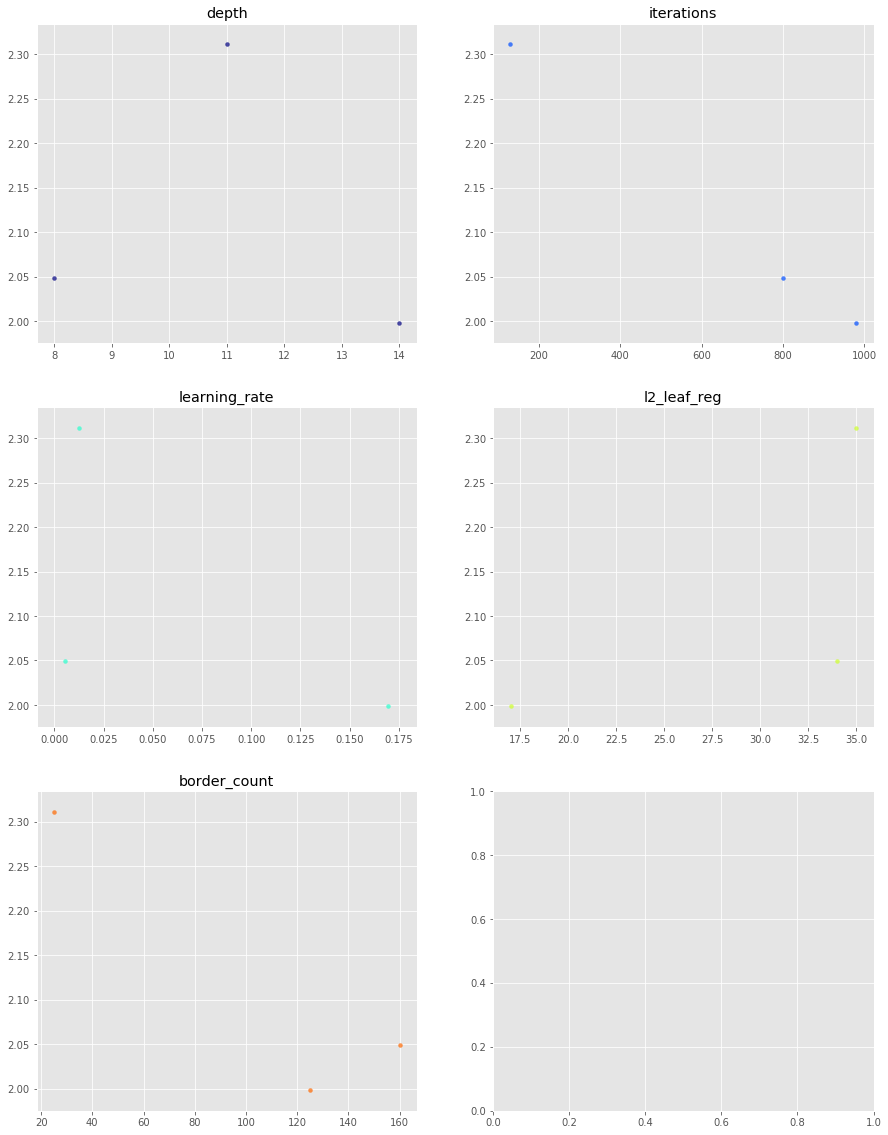

In [372]:
# n_estimators = list(range(50, 525, 25))
# max_depth = list(range(3, 9, 1))

parameters = [ 
        'depth','iterations',
        'learning_rate', 'l2_leaf_reg',
        'border_count', 
    
#     'bagging_fraction',
#         'learning_rate', 'min_sum_hessian_in_leaf',
#         'lambda_l1', 'lambda_l2',
# #         'scale', 'normalize',
#         'boosting_type' 
]

# choice_list = ["n_estimators", "max_depth"]

f, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
cmap = plt.cm.jet
for i, val in enumerate(parameters):
    xs = np.array([t['misc']['vals'][val] for t in trials.trials]).ravel()
    ys = [t['result']['loss'] for t in trials.trials]
    xs, ys = zip(*sorted(zip(xs, ys)))
    ys = np.array(ys)
    
#     if val in choice_list:
#         xs = tuple([eval(val)[index] for index in list(xs)])

        
    axes[i//2,i%2].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.7, c=cmap(float(i)/len(parameters)))
    axes[i//2,i%2].set_title(val)
    #axes[i/3,i%3].set_ylim([0.9,1.0])

In [387]:
cat = cb.CatBoostRegressor()
cat.set_params(**best_params_cat)
cat.fit(X_train, y_train, plot=True)

MetricVisualizer(data={'catboost_info': {'path': 'catboost_info', 'name': 'catboost_info', 'content': {'passed_iterations': 0, 'total_iterations': 980, 'data': {'iterations': [], 'meta': {'launch_mode': 'Train', 'name': 'experiment', 'iteration_count': 980, 'learn_metrics': [{'best_value': 'Min', 'name': 'RMSE'}], 'test_sets': [], 'test_metrics': [], 'learn_sets': ['learn']}}}}}, layout=Layout(align_self='stretch', height='500px'))

0:	learn: 4.2190562	total: 3.4s	remaining: 55m 25s
1:	learn: 3.7304251	total: 4.16s	remaining: 33m 56s
2:	learn: 3.3285268	total: 4.28s	remaining: 23m 14s
3:	learn: 3.0152125	total: 4.3s	remaining: 17m 30s
4:	learn: 2.7771779	total: 4.33s	remaining: 14m 5s
5:	learn: 2.5878350	total: 4.55s	remaining: 12m 18s
6:	learn: 2.4397945	total: 7.91s	remaining: 18m 19s
7:	learn: 2.3307135	total: 9.68s	remaining: 19m 36s
8:	learn: 2.2379795	total: 13.3s	remaining: 23m 54s
9:	learn: 2.1571045	total: 16.7s	remaining: 26m 55s
10:	learn: 2.0892954	total: 19.9s	remaining: 29m 14s
11:	learn: 2.0397989	total: 23.4s	remaining: 31m 24s
12:	learn: 2.0042392	total: 27.3s	remaining: 33m 53s
13:	learn: 1.9648725	total: 30.8s	remaining: 35m 25s
14:	learn: 1.9310501	total: 34.4s	remaining: 36m 50s
15:	learn: 1.9069707	total: 38s	remaining: 38m 9s
16:	learn: 1.8860489	total: 41.7s	remaining: 39m 24s
17:	learn: 1.8697713	total: 45.2s	remaining: 40m 17s
18:	learn: 1.8520050	total: 49s	remaining: 41m 19s
19:	learn: 

153:	learn: 1.2427031	total: 8m 58s	remaining: 48m 9s
154:	learn: 1.2398732	total: 9m 2s	remaining: 48m 5s
155:	learn: 1.2386633	total: 9m 5s	remaining: 48m 2s
156:	learn: 1.2352658	total: 9m 9s	remaining: 48m
157:	learn: 1.2341118	total: 9m 13s	remaining: 47m 57s
158:	learn: 1.2297479	total: 9m 17s	remaining: 47m 59s
159:	learn: 1.2282252	total: 9m 21s	remaining: 47m 57s
160:	learn: 1.2261118	total: 9m 25s	remaining: 47m 54s
161:	learn: 1.2250570	total: 9m 29s	remaining: 47m 53s
162:	learn: 1.2233181	total: 9m 33s	remaining: 47m 56s
163:	learn: 1.2190774	total: 9m 39s	remaining: 48m 1s
164:	learn: 1.2167983	total: 9m 43s	remaining: 48m
165:	learn: 1.2133009	total: 9m 47s	remaining: 47m 59s
166:	learn: 1.2120964	total: 9m 51s	remaining: 47m 57s
167:	learn: 1.2098428	total: 9m 54s	remaining: 47m 55s
168:	learn: 1.2088950	total: 9m 58s	remaining: 47m 53s
169:	learn: 1.2079036	total: 10m 2s	remaining: 47m 51s
170:	learn: 1.2051899	total: 10m 6s	remaining: 47m 49s
171:	learn: 1.2039372	tot

301:	learn: 1.0348360	total: 19m 36s	remaining: 44m 2s
302:	learn: 1.0348291	total: 19m 36s	remaining: 43m 49s
303:	learn: 1.0335961	total: 19m 41s	remaining: 43m 47s
304:	learn: 1.0325999	total: 19m 46s	remaining: 43m 45s
305:	learn: 1.0310088	total: 19m 51s	remaining: 43m 43s
306:	learn: 1.0307937	total: 19m 56s	remaining: 43m 41s
307:	learn: 1.0286507	total: 20m 1s	remaining: 43m 40s
308:	learn: 1.0267523	total: 20m 5s	remaining: 43m 38s
309:	learn: 1.0251842	total: 20m 10s	remaining: 43m 36s
310:	learn: 1.0242058	total: 20m 15s	remaining: 43m 34s
311:	learn: 1.0230513	total: 20m 20s	remaining: 43m 32s
312:	learn: 1.0223373	total: 20m 25s	remaining: 43m 30s
313:	learn: 1.0219788	total: 20m 29s	remaining: 43m 28s
314:	learn: 1.0214945	total: 20m 34s	remaining: 43m 26s
315:	learn: 1.0204869	total: 20m 39s	remaining: 43m 23s
316:	learn: 1.0200068	total: 20m 43s	remaining: 43m 21s
317:	learn: 1.0195503	total: 20m 48s	remaining: 43m 19s
318:	learn: 1.0189242	total: 20m 53s	remaining: 43m

449:	learn: 0.9090246	total: 30m 42s	remaining: 36m 10s
450:	learn: 0.9084860	total: 30m 46s	remaining: 36m 6s
451:	learn: 0.9072152	total: 30m 50s	remaining: 36m 2s
452:	learn: 0.9068269	total: 30m 54s	remaining: 35m 57s
453:	learn: 0.9060419	total: 30m 58s	remaining: 35m 53s
454:	learn: 0.9055353	total: 31m 2s	remaining: 35m 49s
455:	learn: 0.9038706	total: 31m 6s	remaining: 35m 44s
456:	learn: 0.9034866	total: 31m 10s	remaining: 35m 40s
457:	learn: 0.9025194	total: 31m 14s	remaining: 35m 36s
458:	learn: 0.9022925	total: 31m 18s	remaining: 35m 31s
459:	learn: 0.9011514	total: 31m 22s	remaining: 35m 27s
460:	learn: 0.9002723	total: 31m 25s	remaining: 35m 23s
461:	learn: 0.8996285	total: 31m 29s	remaining: 35m 18s
462:	learn: 0.8994002	total: 31m 33s	remaining: 35m 14s
463:	learn: 0.8992588	total: 31m 37s	remaining: 35m 10s
464:	learn: 0.8989861	total: 31m 41s	remaining: 35m 5s
465:	learn: 0.8987750	total: 31m 45s	remaining: 35m 1s
466:	learn: 0.8982593	total: 31m 48s	remaining: 34m 56

597:	learn: 0.8062919	total: 40m 42s	remaining: 25m 59s
598:	learn: 0.8058287	total: 40m 45s	remaining: 25m 55s
599:	learn: 0.8043952	total: 40m 49s	remaining: 25m 51s
600:	learn: 0.8040653	total: 40m 53s	remaining: 25m 47s
601:	learn: 0.8039219	total: 40m 57s	remaining: 25m 43s
602:	learn: 0.8038163	total: 41m 1s	remaining: 25m 38s
603:	learn: 0.8027615	total: 41m 5s	remaining: 25m 34s
604:	learn: 0.8018617	total: 41m 9s	remaining: 25m 30s
605:	learn: 0.8014479	total: 41m 13s	remaining: 25m 26s
606:	learn: 0.8012349	total: 41m 17s	remaining: 25m 22s
607:	learn: 0.8009900	total: 41m 21s	remaining: 25m 18s
608:	learn: 0.8005671	total: 41m 25s	remaining: 25m 14s
609:	learn: 0.8004185	total: 41m 29s	remaining: 25m 10s
610:	learn: 0.8002391	total: 41m 33s	remaining: 25m 5s
611:	learn: 0.7994586	total: 41m 37s	remaining: 25m 1s
612:	learn: 0.7990497	total: 41m 42s	remaining: 24m 58s
613:	learn: 0.7986380	total: 41m 46s	remaining: 24m 54s
614:	learn: 0.7984252	total: 41m 51s	remaining: 24m 5

745:	learn: 0.7392551	total: 49m 46s	remaining: 15m 36s
746:	learn: 0.7382880	total: 49m 50s	remaining: 15m 32s
747:	learn: 0.7380260	total: 49m 53s	remaining: 15m 28s
748:	learn: 0.7374679	total: 49m 57s	remaining: 15m 24s
749:	learn: 0.7373889	total: 50m 1s	remaining: 15m 20s
750:	learn: 0.7372441	total: 50m 4s	remaining: 15m 16s
751:	learn: 0.7367289	total: 50m 8s	remaining: 15m 12s
752:	learn: 0.7366283	total: 50m 11s	remaining: 15m 7s
753:	learn: 0.7355797	total: 50m 15s	remaining: 15m 3s
754:	learn: 0.7352625	total: 50m 19s	remaining: 14m 59s
755:	learn: 0.7340428	total: 50m 22s	remaining: 14m 55s
756:	learn: 0.7335801	total: 50m 26s	remaining: 14m 51s
757:	learn: 0.7333236	total: 50m 29s	remaining: 14m 47s
758:	learn: 0.7326548	total: 50m 33s	remaining: 14m 43s
759:	learn: 0.7320004	total: 50m 37s	remaining: 14m 39s
760:	learn: 0.7310468	total: 50m 40s	remaining: 14m 35s
761:	learn: 0.7305780	total: 50m 44s	remaining: 14m 30s
762:	learn: 0.7297659	total: 50m 47s	remaining: 14m 2

894:	learn: 0.6773796	total: 58m 43s	remaining: 5m 34s
895:	learn: 0.6771934	total: 58m 47s	remaining: 5m 30s
896:	learn: 0.6768029	total: 58m 51s	remaining: 5m 26s
897:	learn: 0.6763122	total: 58m 55s	remaining: 5m 22s
898:	learn: 0.6758078	total: 58m 59s	remaining: 5m 18s
899:	learn: 0.6752941	total: 59m 2s	remaining: 5m 14s
900:	learn: 0.6749911	total: 59m 6s	remaining: 5m 10s
901:	learn: 0.6749504	total: 59m 9s	remaining: 5m 6s
902:	learn: 0.6741294	total: 59m 13s	remaining: 5m 3s
903:	learn: 0.6739695	total: 59m 17s	remaining: 4m 59s
904:	learn: 0.6739339	total: 59m 20s	remaining: 4m 55s
905:	learn: 0.6738592	total: 59m 24s	remaining: 4m 51s
906:	learn: 0.6737209	total: 59m 28s	remaining: 4m 47s
907:	learn: 0.6735942	total: 59m 31s	remaining: 4m 43s
908:	learn: 0.6734847	total: 59m 35s	remaining: 4m 39s
909:	learn: 0.6728627	total: 59m 39s	remaining: 4m 35s
910:	learn: 0.6727496	total: 59m 42s	remaining: 4m 31s
911:	learn: 0.6727402	total: 59m 44s	remaining: 4m 27s
912:	learn: 0.6

In [388]:
y_pred = cat.predict(X_test)
y_pred = np.exp(y_pred)-1

y_pred = pd.concat([id_test, pd.DataFrame(y_pred, columns=["y_pred"])], axis=1)

y_pred.sort_values(["id_test"], inplace=True)
y_pred.drop("id_test", inplace=True, axis=1)
y_pred = y_pred.values

y_pred = pd.DataFrame(y_pred, columns=["value"])
y_pred = y_pred.reindex(y_pred.index.rename('id'))
y_pred.to_csv("cat_val_feat_0607set.csv")

## ensembles